# Triplets Final Analysis

Goal: A clean version of the triplets analysis for the paper

## Setup

In [1]:
%cd work/notebooks

/home/jovyan/work/notebooks


In [2]:
# Import modules and R
import numpy as np, pandas as pd
import pickle
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [14]:
# Import local code
import sys
sys.path.append('../code/')
from processing_helpers import *
from analysis_helpers import *
from triplets import *
from pcaVersion import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

## Triplets 

In [62]:
triplets_hcp = get_triplets(atlas=fetch_hcp())
save_pickle(triplets_hcp, "triplets_hcp")
# triplets_hcp = load_pickle('triplets_hcp')
print("Got base triplets")
# triplets_hcp_3donors = get_triplets(atlas=fetch_hcp(), donors_threshold=3)
# save_pickle(triplets_hcp_3donors, "triplets_hcp_3donors")
# triplets_hcp_3donors = load_pickle('triplets_hcp_3donors')
print("Got 3donors triplets")

# triplets_hcp_2donors = get_triplets(atlas=fetch_hcp(), donors_threshold=2)
# save_pickle(triplets_hcp_2donors, "triplets_hcp_2donors")
# triplets_hcp_2donors = load_pickle('triplets_hcp_2donors')
# print("Got 2donors triplets")

Done triplet 012
Done triplet 013
Done triplet 014
Done triplet 015
Done triplet 023
Done triplet 024
Done triplet 025
Done triplet 034
Done triplet 035
Done triplet 045
Done triplet 123
Done triplet 124
Done triplet 125
Done triplet 134
Done triplet 135
Done triplet 145
Done triplet 234
Done triplet 235
Done triplet 245
Done triplet 345
Got base triplets
Got 3donors triplets


# Compare region filter levels

In [63]:
triplets_hcp_rs3 = filter_triplet_stability(triplets_hcp, stability_threshold=.3, which='regions')
triplets_hcp_rs1 = filter_triplet_stability(triplets_hcp, stability_threshold=.1, which='regions')

In [64]:
pca_rs3 = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp_rs3, approach='pca', kernel=None))
dm_rs3 = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp_rs3, approach='dm', kernel='normalized_angle', alpha=1))
pca_rs1 = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp_rs1, approach='pca', kernel=None))
dm_rs1 = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp_rs1, approach='dm', kernel='normalized_angle', alpha=1))

Computed triplet stability
Computed triplet stability
Computed triplet stability
Computed triplet stability


In [58]:
pca = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp, approach='pca', kernel=None))
# dm = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp, approach='dm', kernel='normalized_angle', alpha=1))
pca_3d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp_3donors, approach='pca', kernel=None))
# dm_3d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_hcp_3donors, approach='dm', kernel='normalized_angle', alpha=1))

Computed triplet stability
Computed triplet stability


In [65]:
triplets_dict = {
    'PCA':pca, 
    'Diffusion Map':dm,
    'PCA, 3+ donors/region':pca_3d,
    'Diffusion Map, 3+ donors/region':dm_3d,
    'PCA, top 70%':pca_rs3,
    'Diffusion Map, top 70%':dm_rs3,
    'PCA, top 90%':pca_rs1,
    'Diffusion Map, top 90%':dm_rs1    
}

triplets_plot_v2 = (pd.concat(triplets_dict)
 .reset_index(0)
 .rename({'level_0':'method', 'version':'DS'}, axis=1)
 .assign(method = lambda x: pd.Categorical(x['method'], ordered=True, categories=triplets_dict.keys()))
                   )
triplets_plot_v2

method            how   DS component     pair      corr  \
0                       PCA  Region scores  0.0         1  012-345  0.774335   
1                       PCA  Region scores  0.0         2  012-345  0.041373   
2                       PCA  Region scores  0.0         3  012-345  0.245818   
3                       PCA  Region scores  0.0         4  012-345  0.106467   
4                       PCA  Region scores  0.0         5  012-345 -0.107602   
..                      ...            ...  ...       ...      ...       ...   
495  Diffusion Map, top 90%  Region scores  0.9         1  045-123  0.956124   
496  Diffusion Map, top 90%  Region scores  0.9         2  045-123 -0.888050   
497  Diffusion Map, top 90%  Region scores  0.9         3  045-123  0.865245   
498  Diffusion Map, top 90%  Region scores  0.9         4  045-123 -0.749012   
499  Diffusion Map, top 90%  Region scores  0.9         5  045-123 -0.708778   

     corr_abs  
0    0.774335  
1    0.041373  
2    0.245818  
3    0.106467  
4    0.107602  
..        ...  
495  0.956124  
496  0.888050  
497  0.865245  
498  0.749012  
499  0.708778  

[4000 rows x 7 columns]

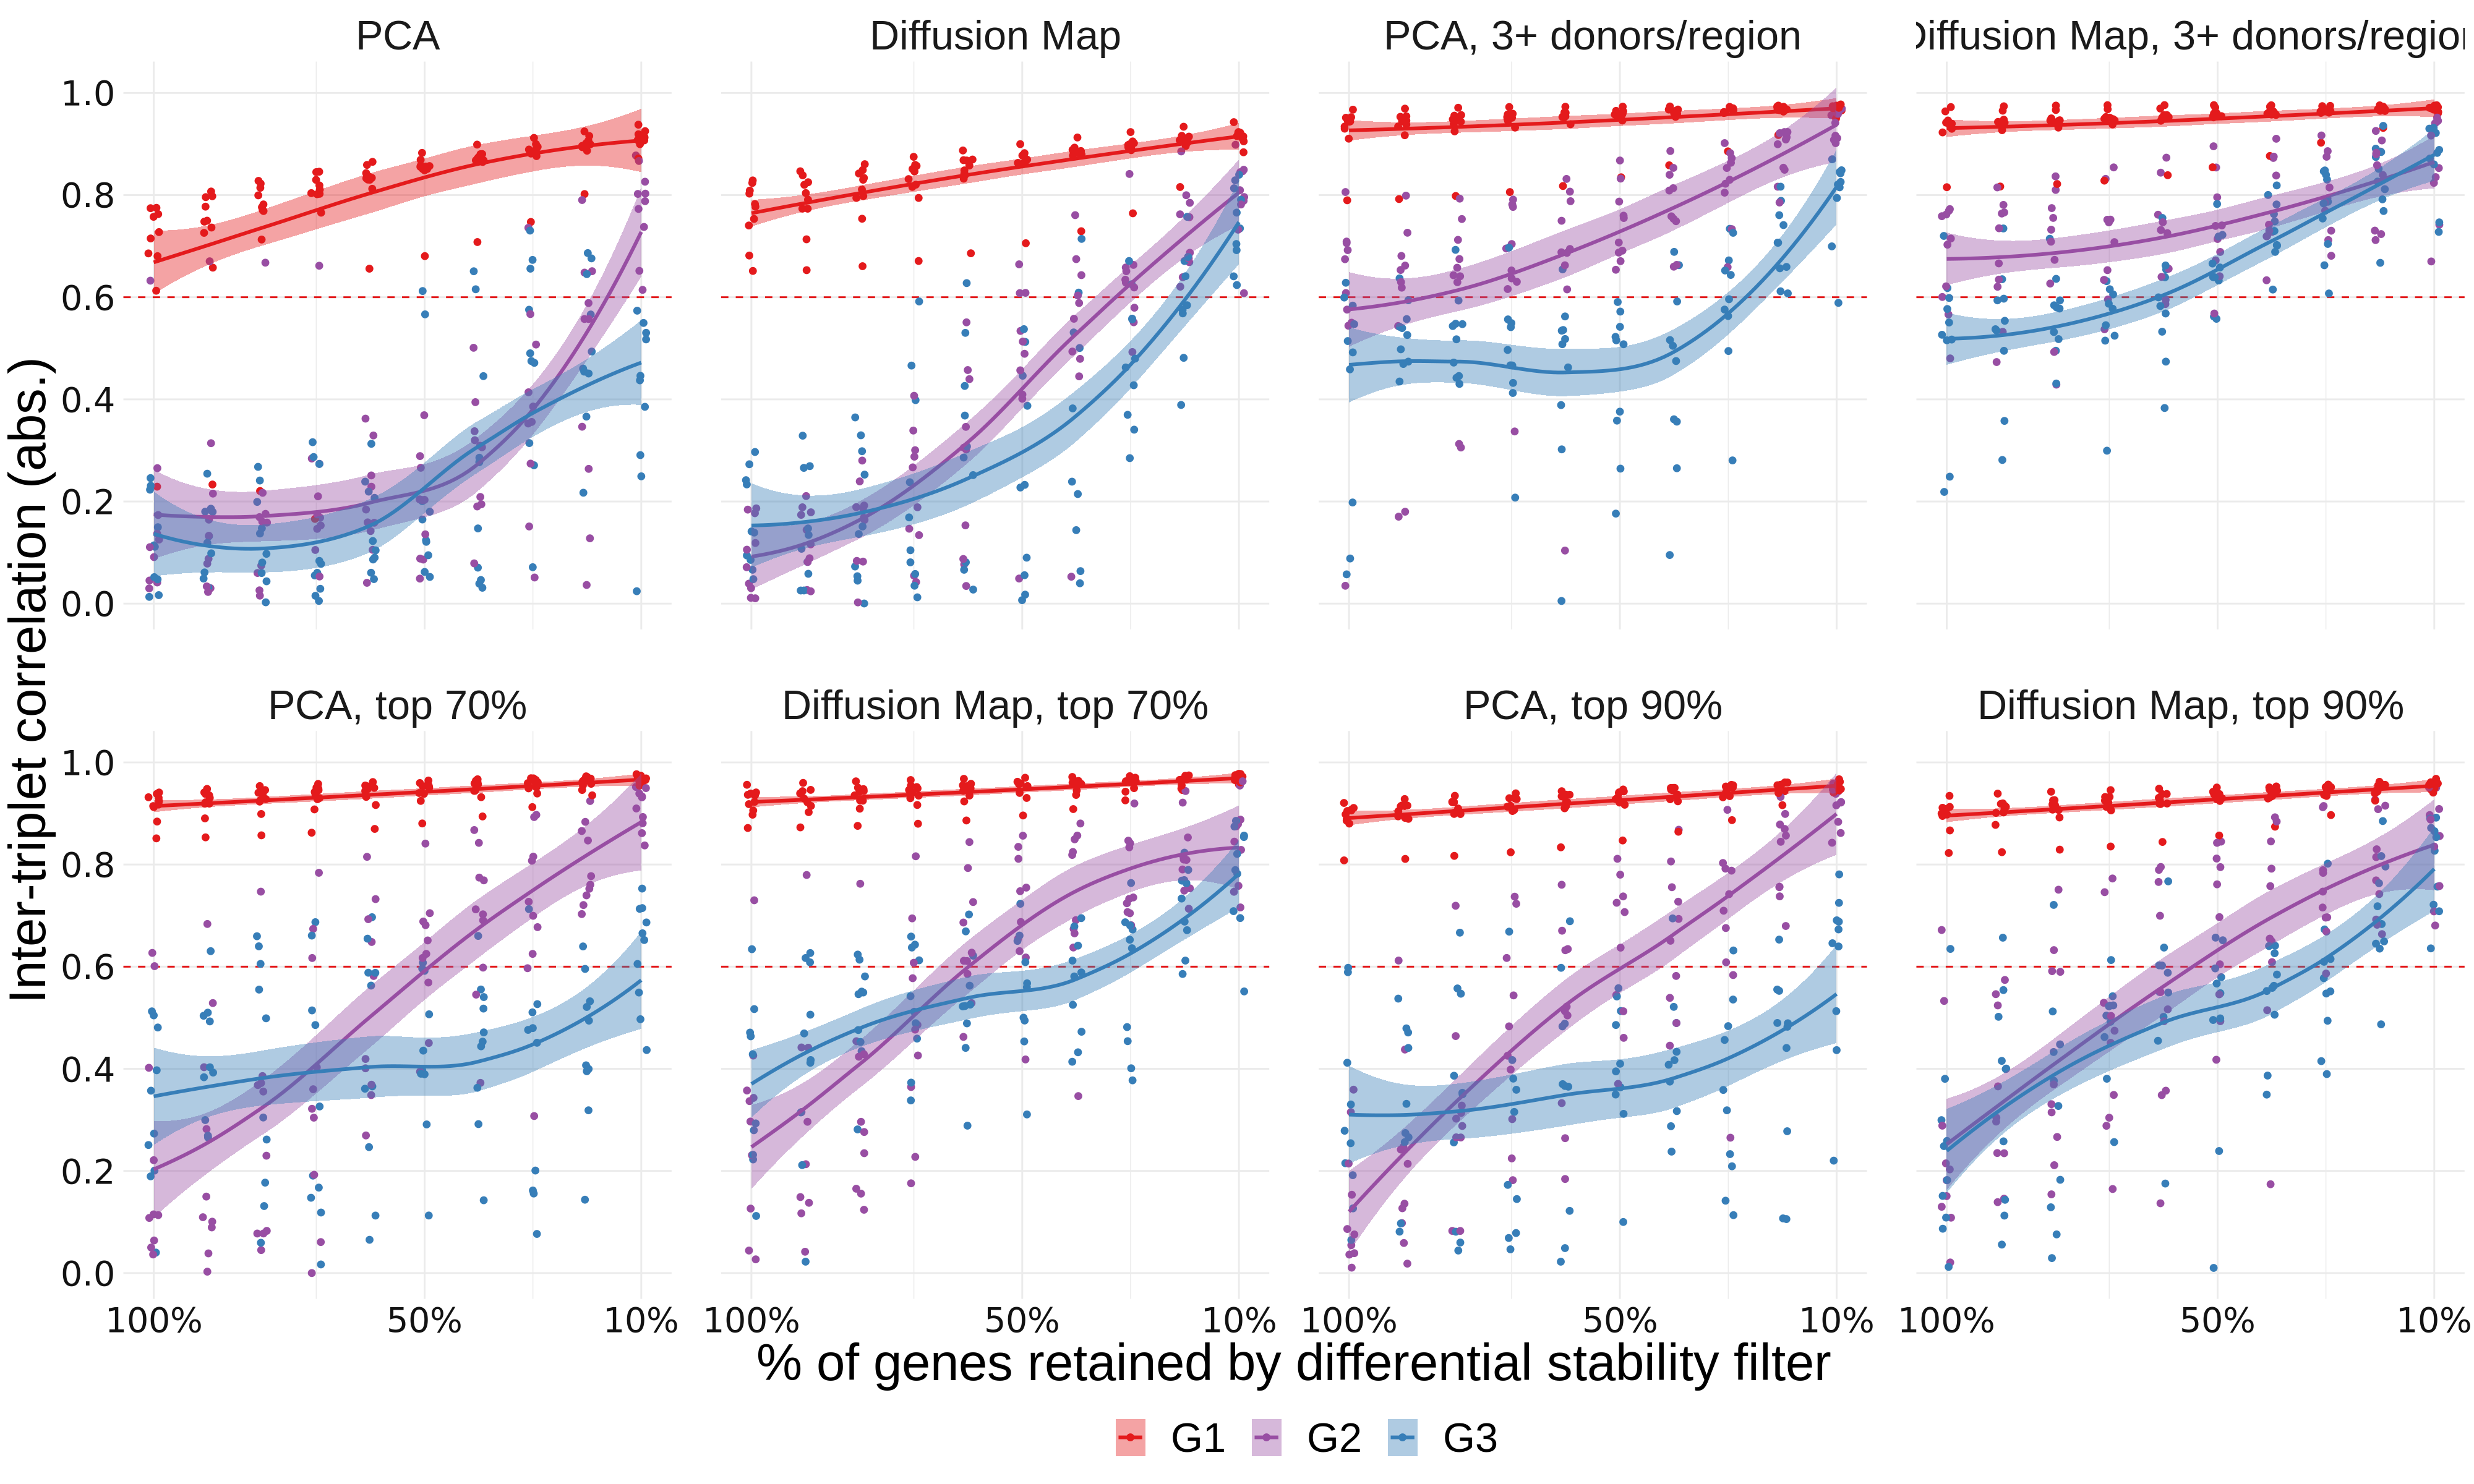

In [66]:
%%R -i triplets_plot_v2 -w 20 -h 12 --units in -r 200
source("../code/Rplots.R")
plot_triplets_v2(triplets_plot_v2, facet='w') & theme(text=element_text(size=30))

In [4]:
pca = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_3donors, use_gradientVersion=True, approach='pca'), with_coefs=False)
dm = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
dm_2d = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
dm_3d = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_3donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)

In [5]:
triplets_dict = {
    'PCA':pca, 
    'Diffusion Map':dm,
    'Diffusion Map, 2+ donors/region':dm_2d,
    'Diffusion Map, 3+ donors/region':dm_3d
}

triplets_plot_v2 = (pd.concat(triplets_dict)
 .reset_index(0)
 .rename({'level_0':'method', 'version':'DS'}, axis=1)
 .assign(method = lambda x: pd.Categorical(x['method'], ordered=True, categories=triplets_dict.keys()))
                   )
triplets_plot_v2

method            how   DS component     pair  \
0                                PCA  Region scores  0.0         1  012-345   
1                                PCA  Region scores  0.0         2  012-345   
2                                PCA  Region scores  0.0         3  012-345   
3                                PCA  Region scores  0.0         4  012-345   
4                                PCA  Region scores  0.0         5  012-345   
..                               ...            ...  ...       ...      ...   
495  Diffusion Map, 3+ donors/region  Region scores  0.9         1  045-123   
496  Diffusion Map, 3+ donors/region  Region scores  0.9         2  045-123   
497  Diffusion Map, 3+ donors/region  Region scores  0.9         3  045-123   
498  Diffusion Map, 3+ donors/region  Region scores  0.9         4  045-123   
499  Diffusion Map, 3+ donors/region  Region scores  0.9         5  045-123   

         corr  corr_abs  
0    0.952485  0.952485  
1    0.674435  0.674435  
2    0.057306  0.057306  
3   -0.563391  0.563391  
4    0.359771  0.359771  
..        ...       ...  
495  0.971192  0.971192  
496  0.951536  0.951536  
497  0.931963  0.931963  
498  0.859585  0.859585  
499  0.865362  0.865362  

[2000 rows x 7 columns]

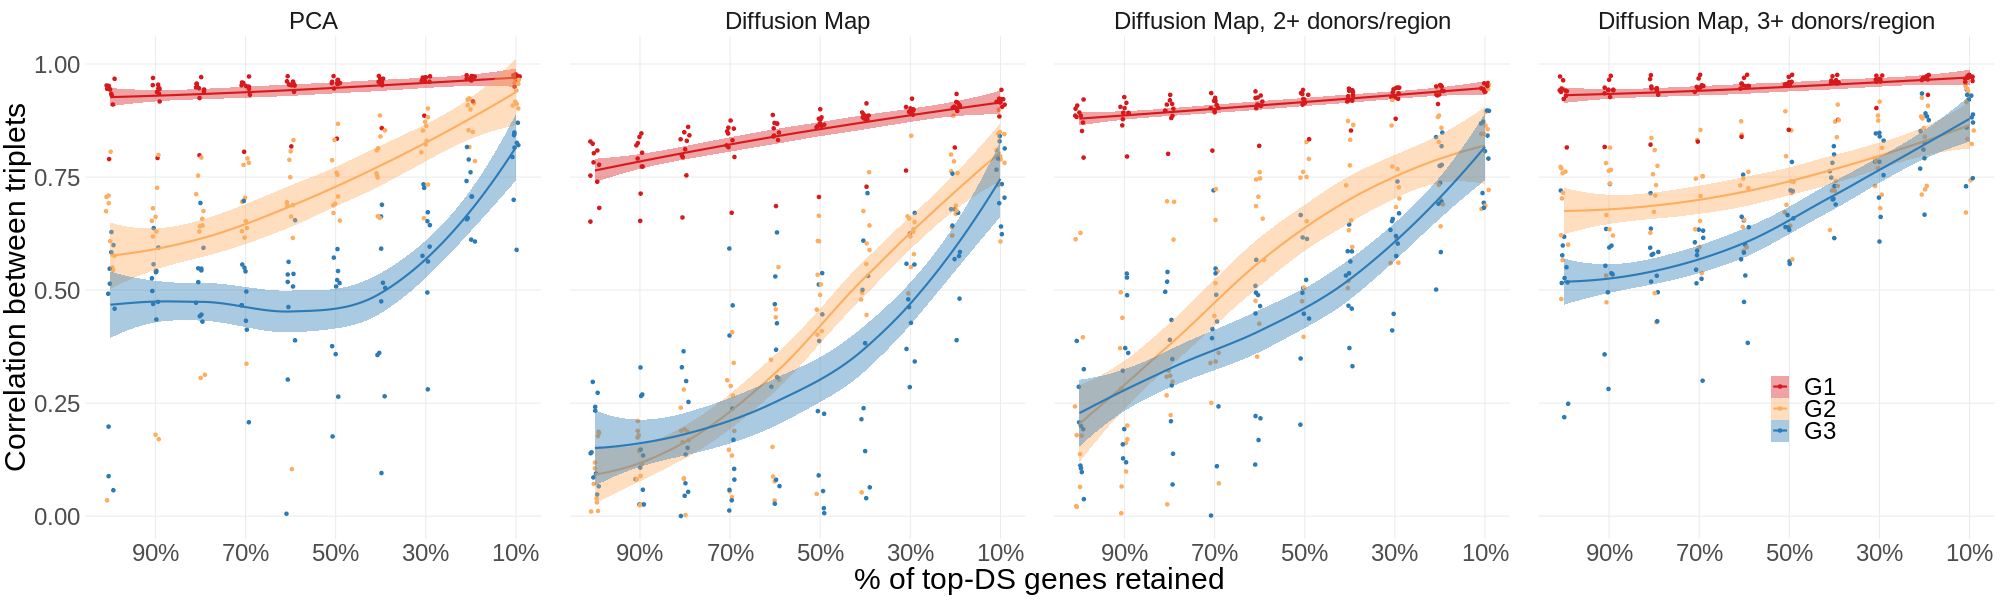

In [6]:
%%R -i triplets_plot_v2 -w 2000 -h 600
source("../code/Rplots.R")
plot_triplets_v2(triplets_plot_v2) & theme(text=element_text(size=30))

---

# DK

In [14]:
# triplets_dk = get_triplets(atlas=fetch_dk())
# save_pickle(triplets_dk, 'triplets_dk')
triplets_dk = load_pickle('triplets_dk')

In [23]:
# pca_dk = make_triplet_ds_plot(get_triplets_ds_levels(triplets_dk, use_gradientVersion=True, approach='pca'), with_coefs=False)
# dm_dk = make_triplet_ds_plot(get_triplets_ds_levels(triplets_dk, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
dm_dk_sparse2 = make_triplet_ds_plot(get_triplets_ds_levels(triplets_dk, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1, sparsity=0.2), with_coefs=False)
dm_dk_sparse8 = make_triplet_ds_plot(get_triplets_ds_levels(triplets_dk, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1, sparsity=0.8), with_coefs=False)
# dm_dk_sparse5 = make_triplet_ds_plot(get_triplets_ds_levels(triplets_dk, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1, sparsity=0.5), with_coefs=False)

In [24]:
triplets_dict = {
    'PCA':pca_dk, 
    'Diffusion Map':dm_dk,
    # 'Diffusion Map Gaussian':dm_dk_gaussian,
    'Diffusion Map Sparsity 0.2':dm_dk_sparse2,
    'Diffusion Map Sparsity 0.5':dm_dk_sparse5,
    'Diffusion Map Sparsity 0.8':dm_dk_sparse8,
}

triplets_plot_v2 = (pd.concat(triplets_dict)
 .reset_index(0)
 .rename({'level_0':'method', 'version':'DS'}, axis=1)
 .assign(method = lambda x: pd.Categorical(x['method'], ordered=True, categories=triplets_dict.keys()))
                   )
triplets_plot_v2

method            how   DS component     pair  \
0                           PCA  Region scores  0.0         1  012-345   
1                           PCA  Region scores  0.0         2  012-345   
2                           PCA  Region scores  0.0         3  012-345   
3                           PCA  Region scores  0.0         4  012-345   
4                           PCA  Region scores  0.0         5  012-345   
..                          ...            ...  ...       ...      ...   
495  Diffusion Map Sparsity 0.8  Region scores  0.9         1  045-123   
496  Diffusion Map Sparsity 0.8  Region scores  0.9         2  045-123   
497  Diffusion Map Sparsity 0.8  Region scores  0.9         3  045-123   
498  Diffusion Map Sparsity 0.8  Region scores  0.9         4  045-123   
499  Diffusion Map Sparsity 0.8  Region scores  0.9         5  045-123   

         corr  corr_abs  
0   -0.864963  0.864963  
1    0.661477  0.661477  
2    0.051359  0.051359  
3    0.269994  0.269994  
4   -0.571443  0.571443  
..        ...       ...  
495  0.977986  0.977986  
496  0.950412  0.950412  
497  0.920556  0.920556  
498  0.941167  0.941167  
499 -0.813987  0.813987  

[2500 rows x 7 columns]

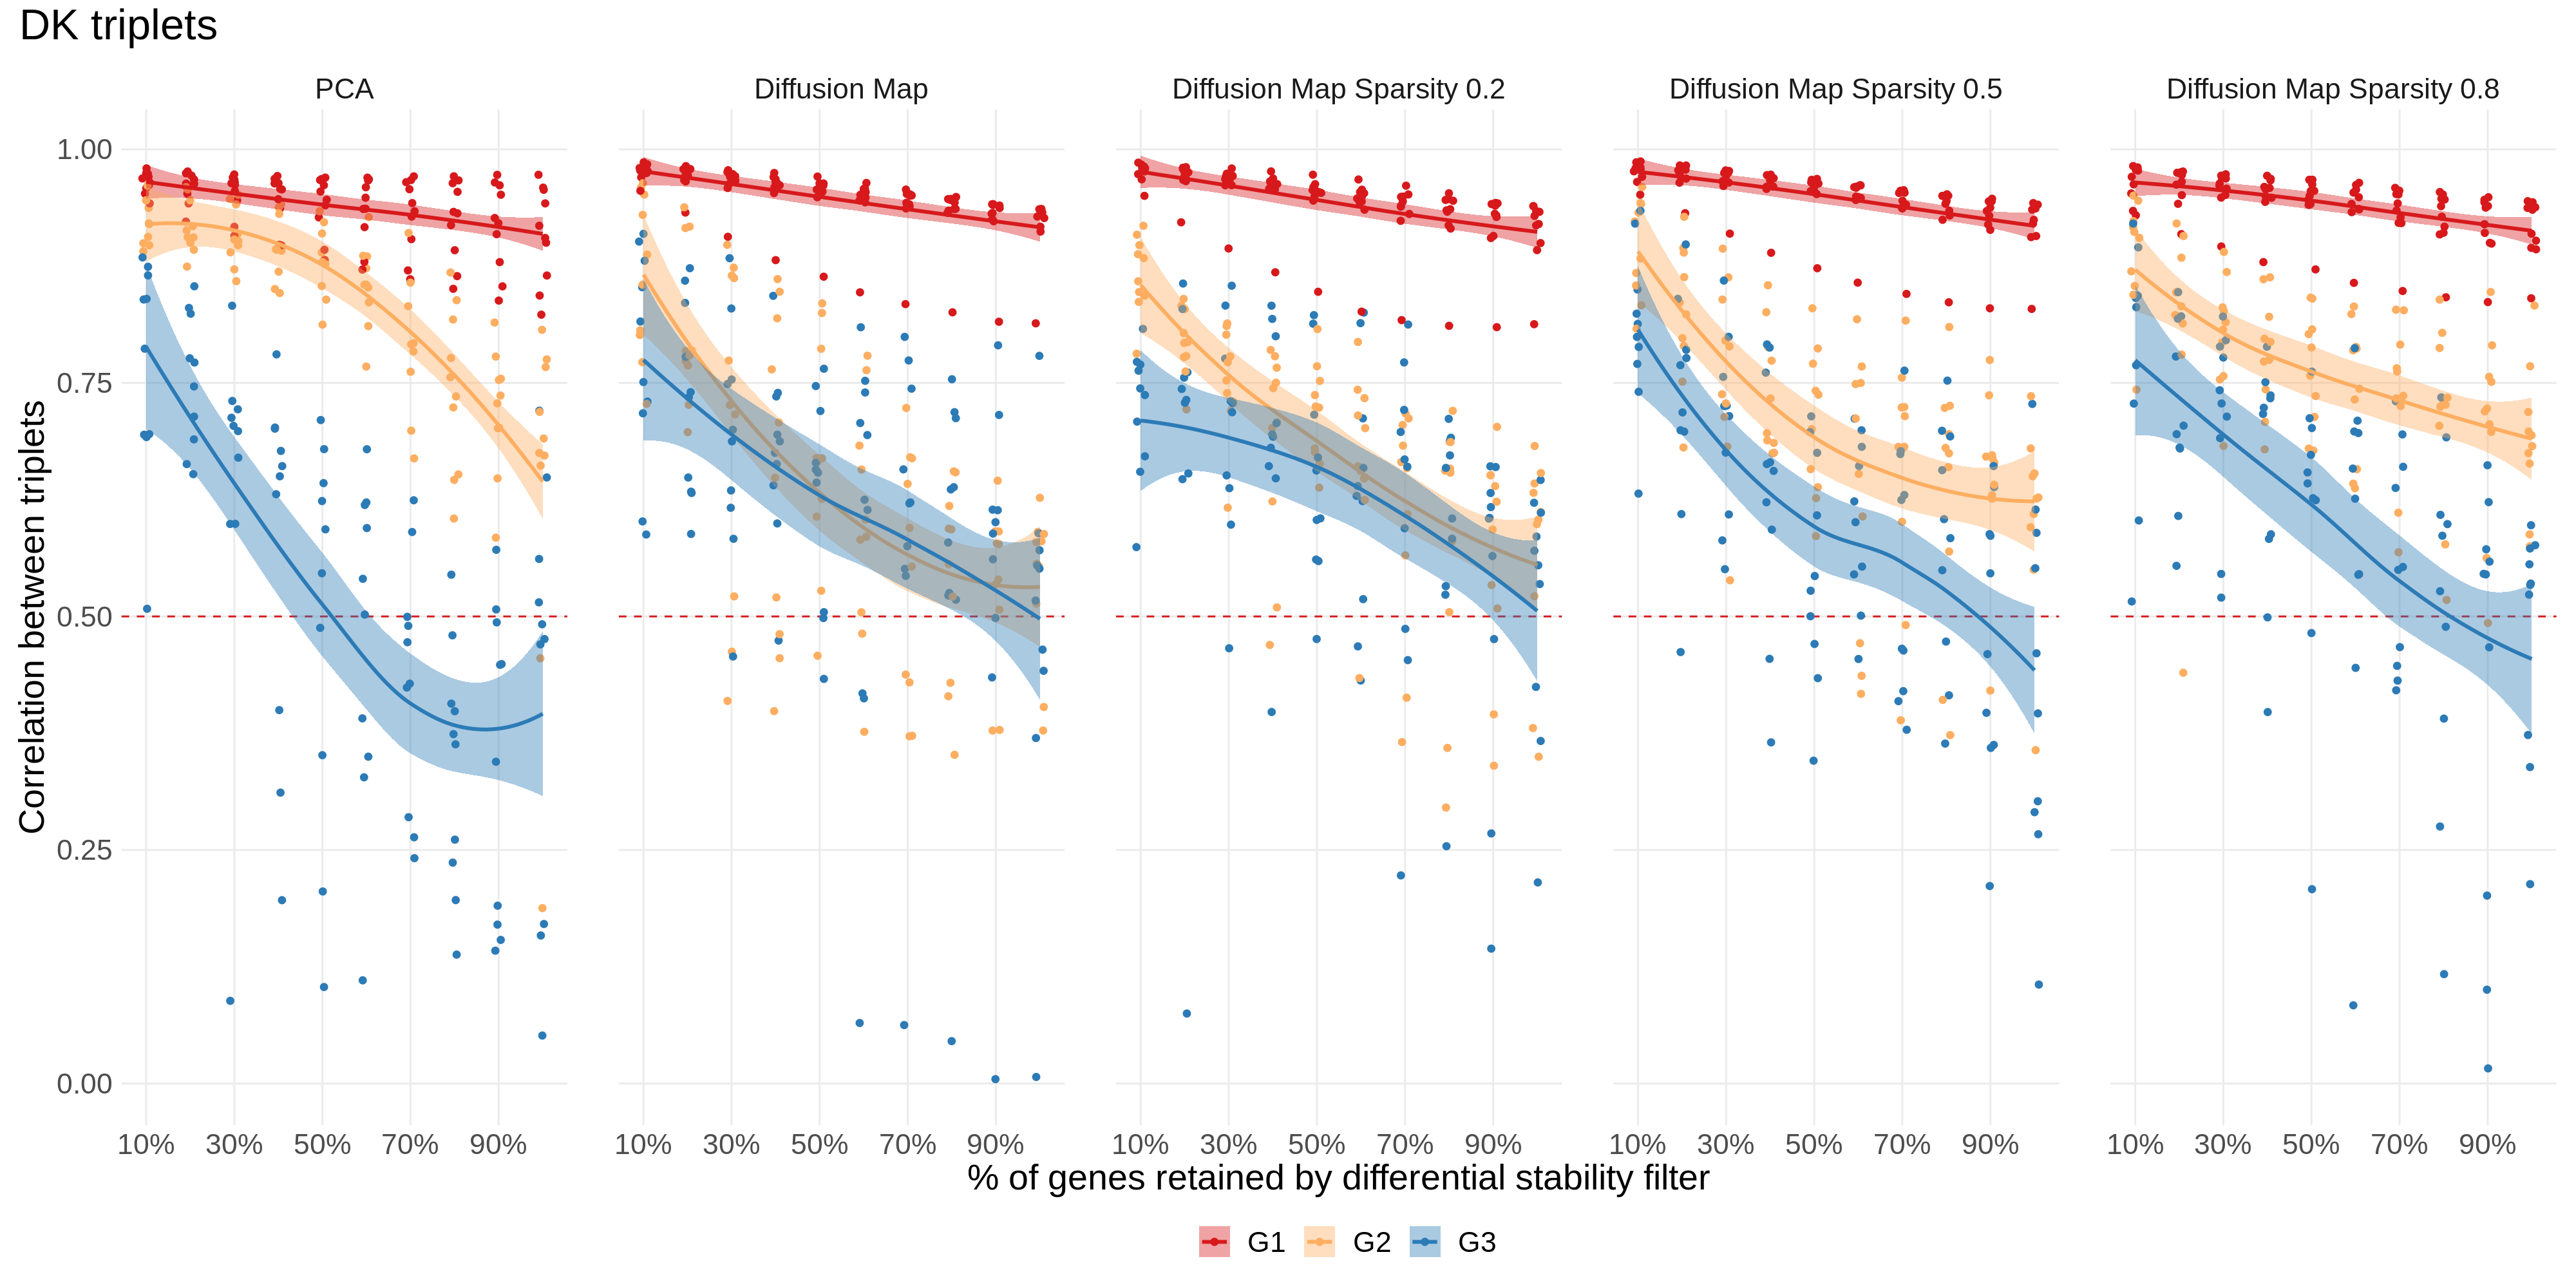

In [25]:
%%R -i triplets_plot_v2 -w 20 -h 10 --units in -r 200
source("../code/Rplots.R")
(
    plot_triplets_v2(triplets_plot_v2) & theme(text=element_text(size=20)) 
) + plot_annotation(title='DK triplets', theme=theme(title=element_text(size=20)))

---

## 1. PCA triplets — no scaling

In [101]:
triplet_versions_dict = {
    'No filters': triplets_hcp,
    'Region filter \n(3+ donors)': triplets_hcp_3donors,
    'Gene filter \n(top 20% diff. stab.)': filter_triplet_ds(triplets_hcp, 0.8),
    'Both region \n& gene filters': filter_triplet_ds(triplets_hcp_3donors, 0.8)
}

triplet_versions = make_triplet_versions_plot(triplet_versions_dict)

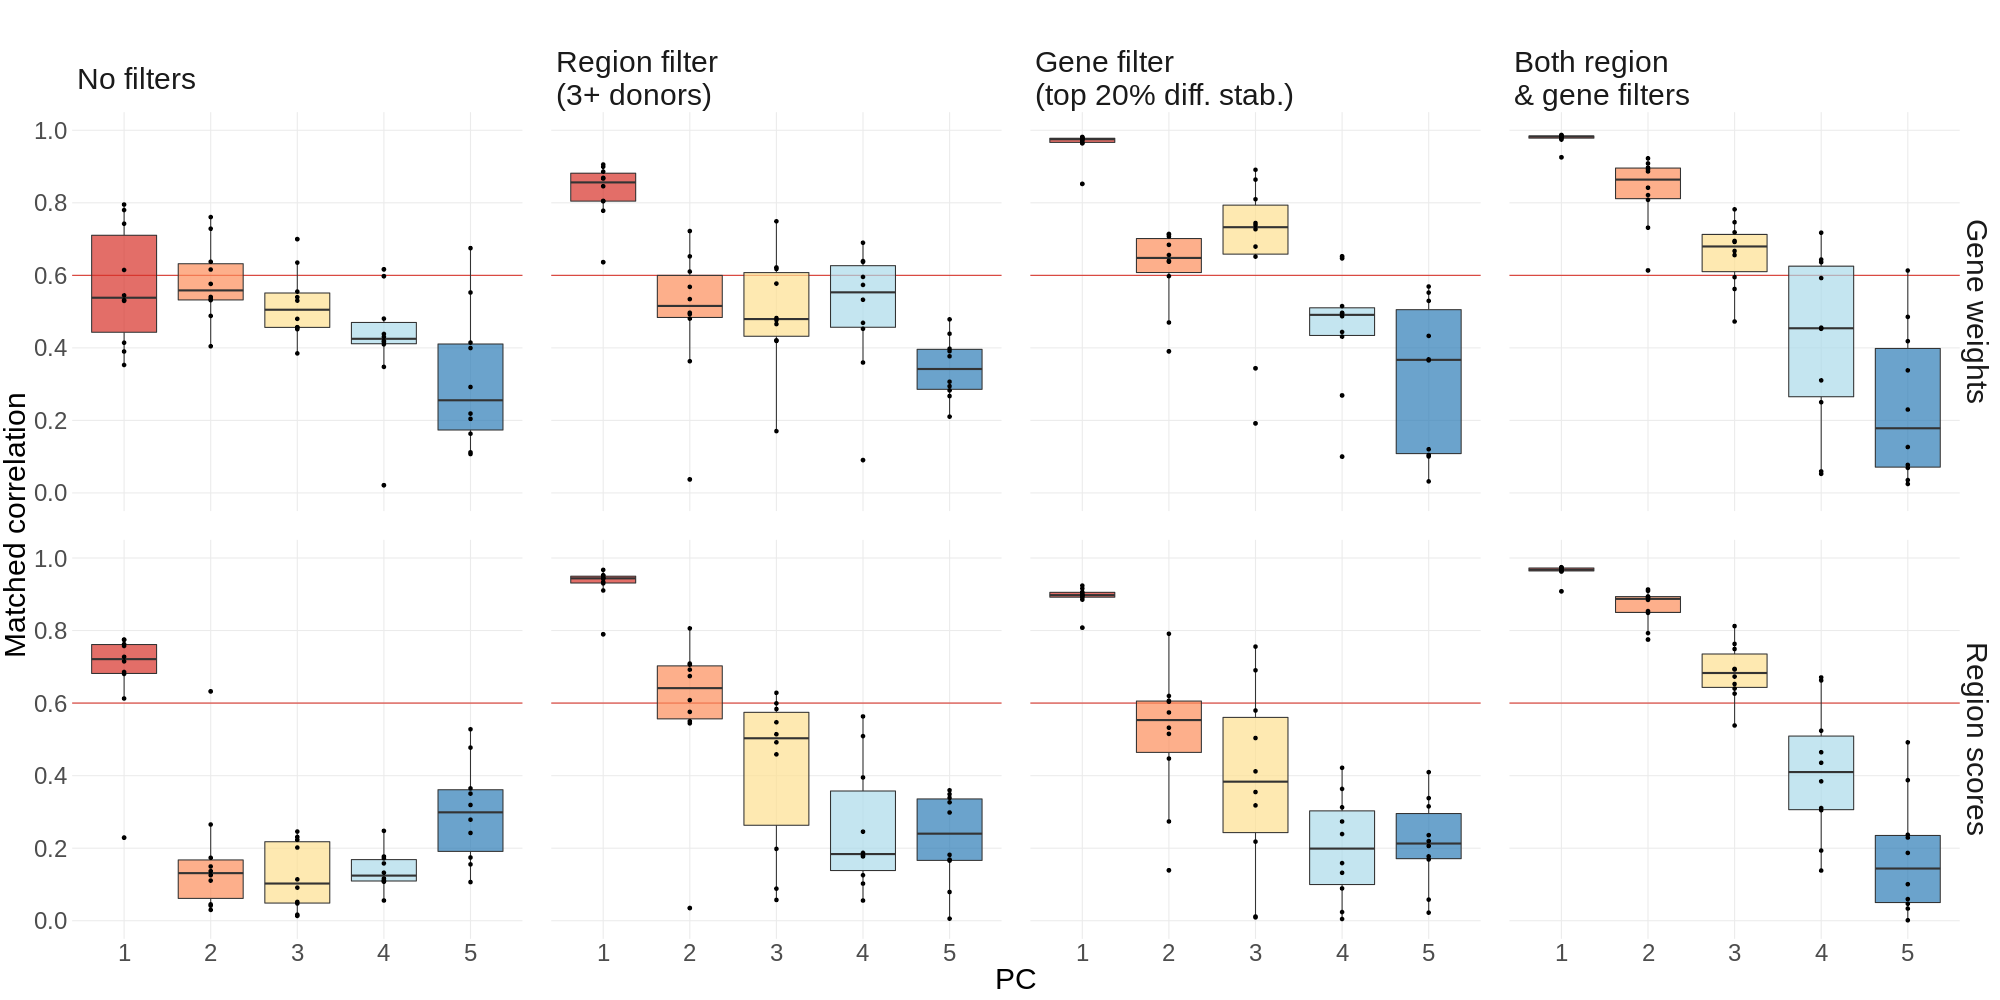

In [102]:
%%R -w 2000 -h 1000 -i triplet_versions
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

## 1a PCA triplets — with scaling

In [53]:
triplet_versions_dict = {
    'No filters': filter_triplet_ds(triplets_hcp, ds_threshold=0, scale=True),
    'Region filter \n(3+ donors)': filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0, scale=True),
    'Gene filter \n(top 20% diff. stab.)': filter_triplet_ds(triplets_hcp, ds_threshold=0.8, scale=True),
    'Both region \n& gene filters': filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, scale=True)
}

triplet_versions = make_triplet_versions_plot(triplet_versions_dict)

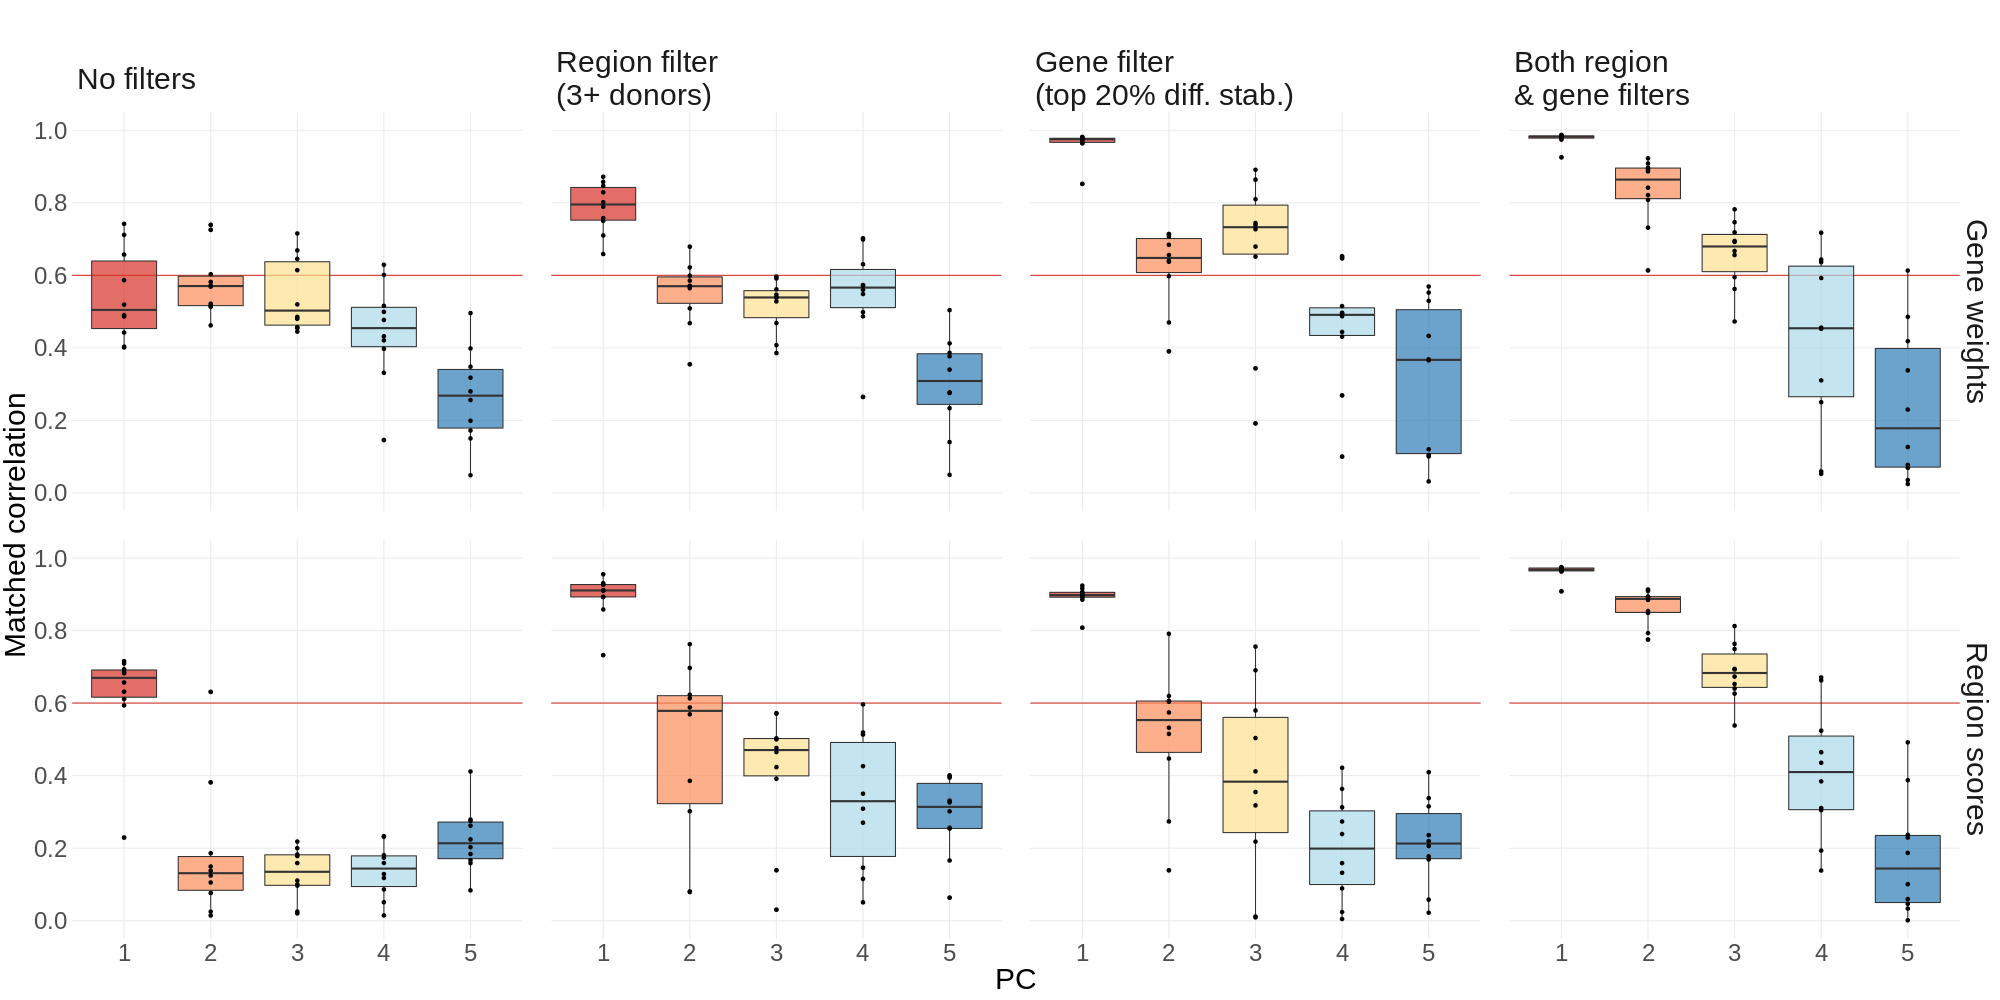

In [54]:
%%R -w 2000 -h 1000 -i triplet_versions
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

Looks identical with and without scaling. Let's confirm if it is:

In [64]:
no_scale = filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, scale=False)
with_scale = filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, scale=True)
no_scale['012'].corr_scores(with_scale['012'])

0         1         2         3         4
0  0.999766  0.015222 -0.008296 -0.000974 -0.007846
1 -0.015199  0.998808 -0.029991 -0.003208 -0.001652
2  0.008126  0.029701  0.997767 -0.039330  0.023997
3  0.000500  0.004220  0.041403  0.994062 -0.095979
4  0.007489  0.001995 -0.020630  0.096574  0.991294

## 2 Diffusion mapping

With DM triplets we only have scores, no coefs

In [147]:
triplet_versions_dict = {
    'No filters': filter_triplet_ds(triplets_hcp, ds_threshold=0, use_gradientVersion=True, approach='dm', kernel='gaussian'),
    'Region filter \n(3+ donors)': filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0, use_gradientVersion=True, approach='dm', kernel='gaussian'),
    'Gene filter \n(top 20% diff. stab.)': filter_triplet_ds(triplets_hcp, ds_threshold=0.8, use_gradientVersion=True, approach='dm', kernel='gaussian'),
    'Both region \n& gene filters': filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, use_gradientVersion=True, approach='dm', kernel='gaussian')
}

triplet_versions = make_triplet_versions_plot(triplet_versions_dict, with_coefs=False)

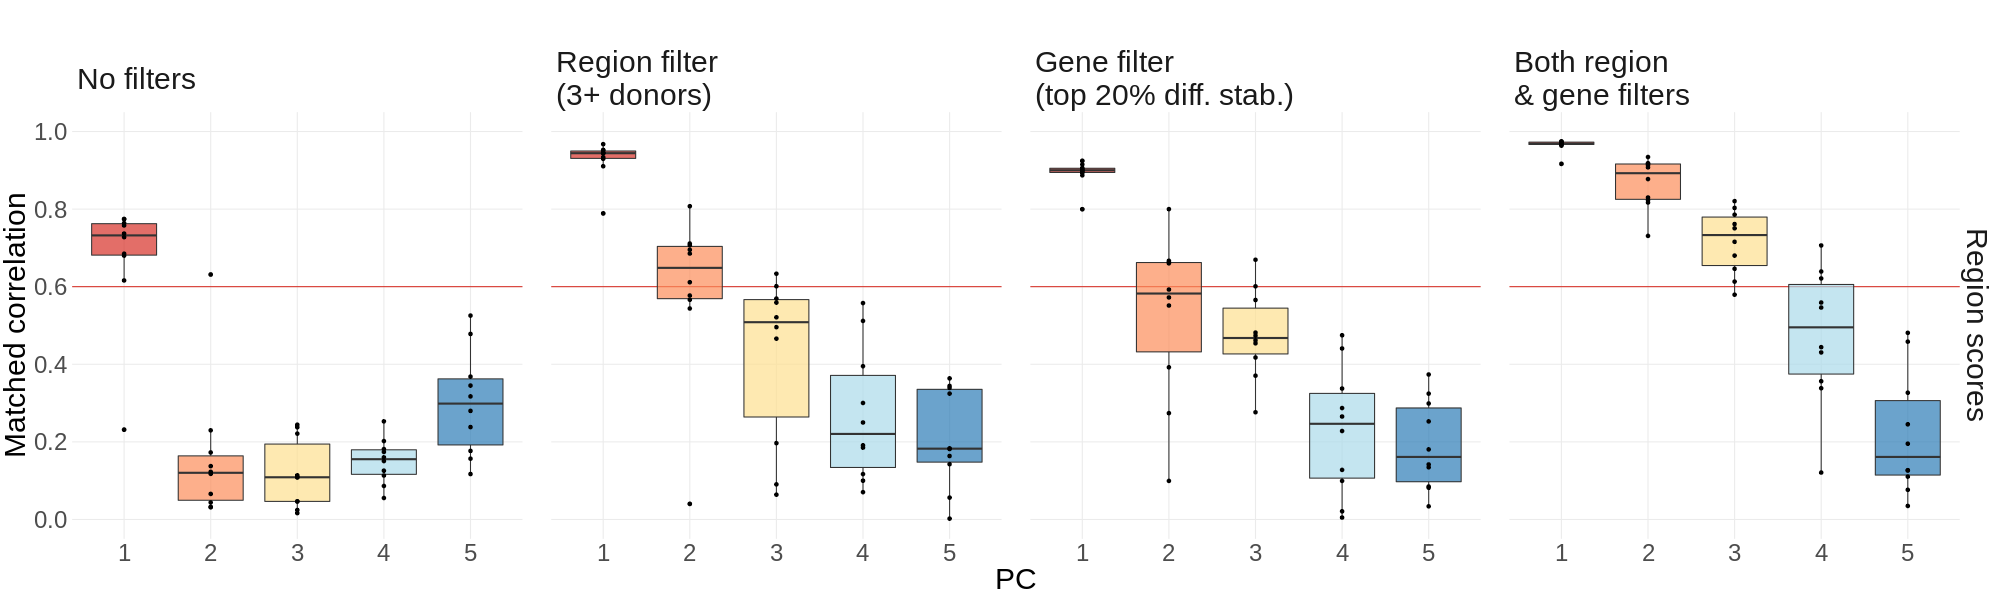

In [148]:
%%R -w 2000 -h 600 -i triplet_versions
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

This looks good! Same overall story.

What about normalized angle kernel instead of gaussian?

In [86]:
triplet_versions_dict = {
    'No filters': filter_triplet_ds(triplets_hcp, ds_threshold=0, use_gradientVersion=True, approach='dm', kernel='normalized_angle'),
    'Region filter \n(3+ donors)': filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0, use_gradientVersion=True, approach='dm', kernel='normalized_angle'),
    'Gene filter \n(top 20% diff. stab.)': filter_triplet_ds(triplets_hcp, ds_threshold=0.8, use_gradientVersion=True, approach='dm', kernel='normalized_angle'),
    'Both region \n& gene filters': filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, use_gradientVersion=True, approach='dm', kernel='normalized_angle')
}

triplet_versions = make_triplet_versions_plot(triplet_versions_dict, with_coefs=False)

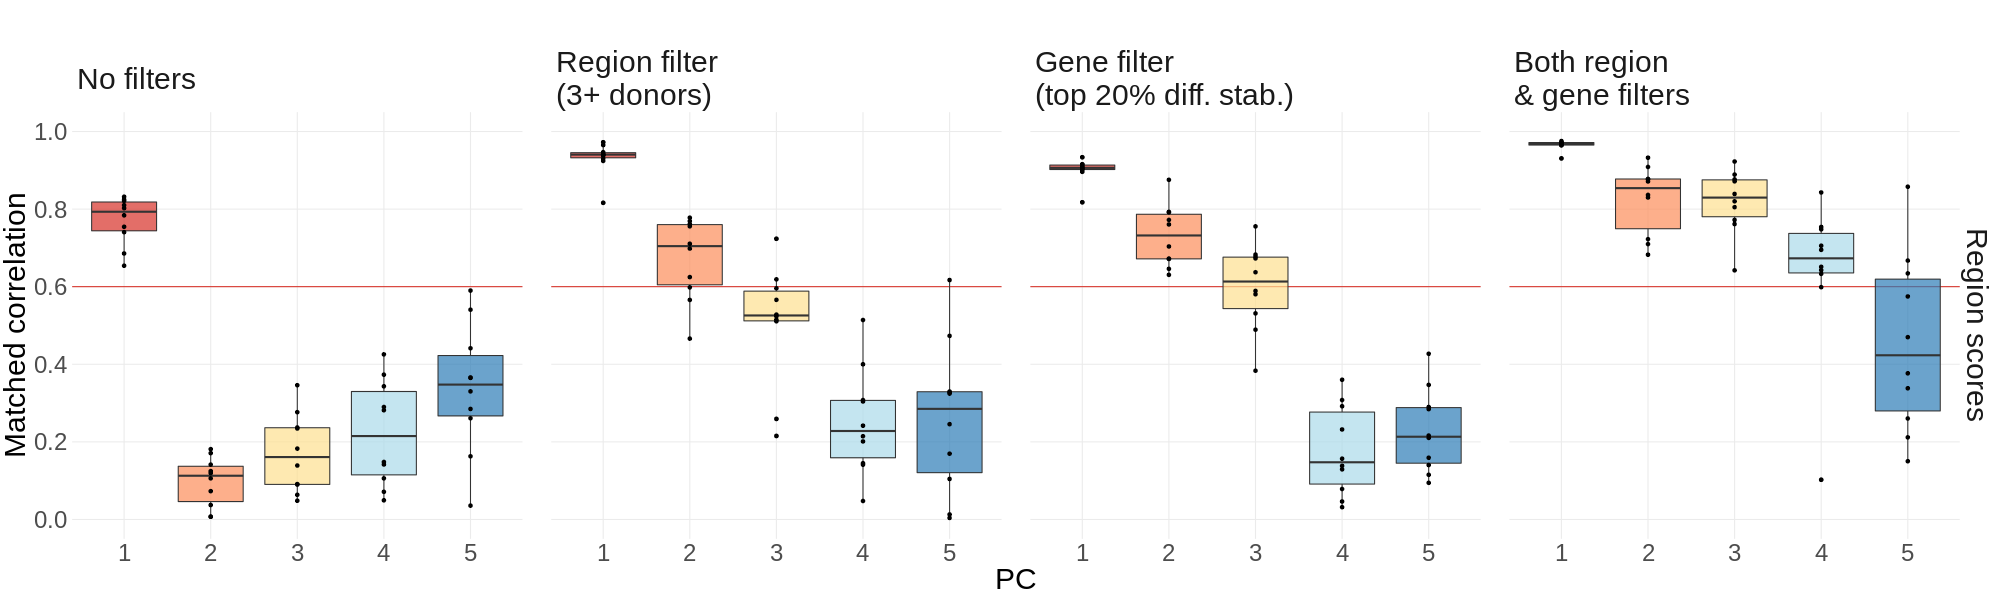

In [87]:
%%R -w 2000 -h 600 -i triplet_versions
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

# 3 Changing DS level

Goal is to retain more genes, so does DM let us reduce the DS filter?

In [315]:
triplets_ds_levels = {}
for ds in [i/10 for i in range(0,10)]:
     triplets_ds_levels[ds] = filter_triplet_ds(triplets_hcp_3donors, ds)

In [316]:
triplet_versions = make_triplet_ds_plot(triplets_ds_levels)

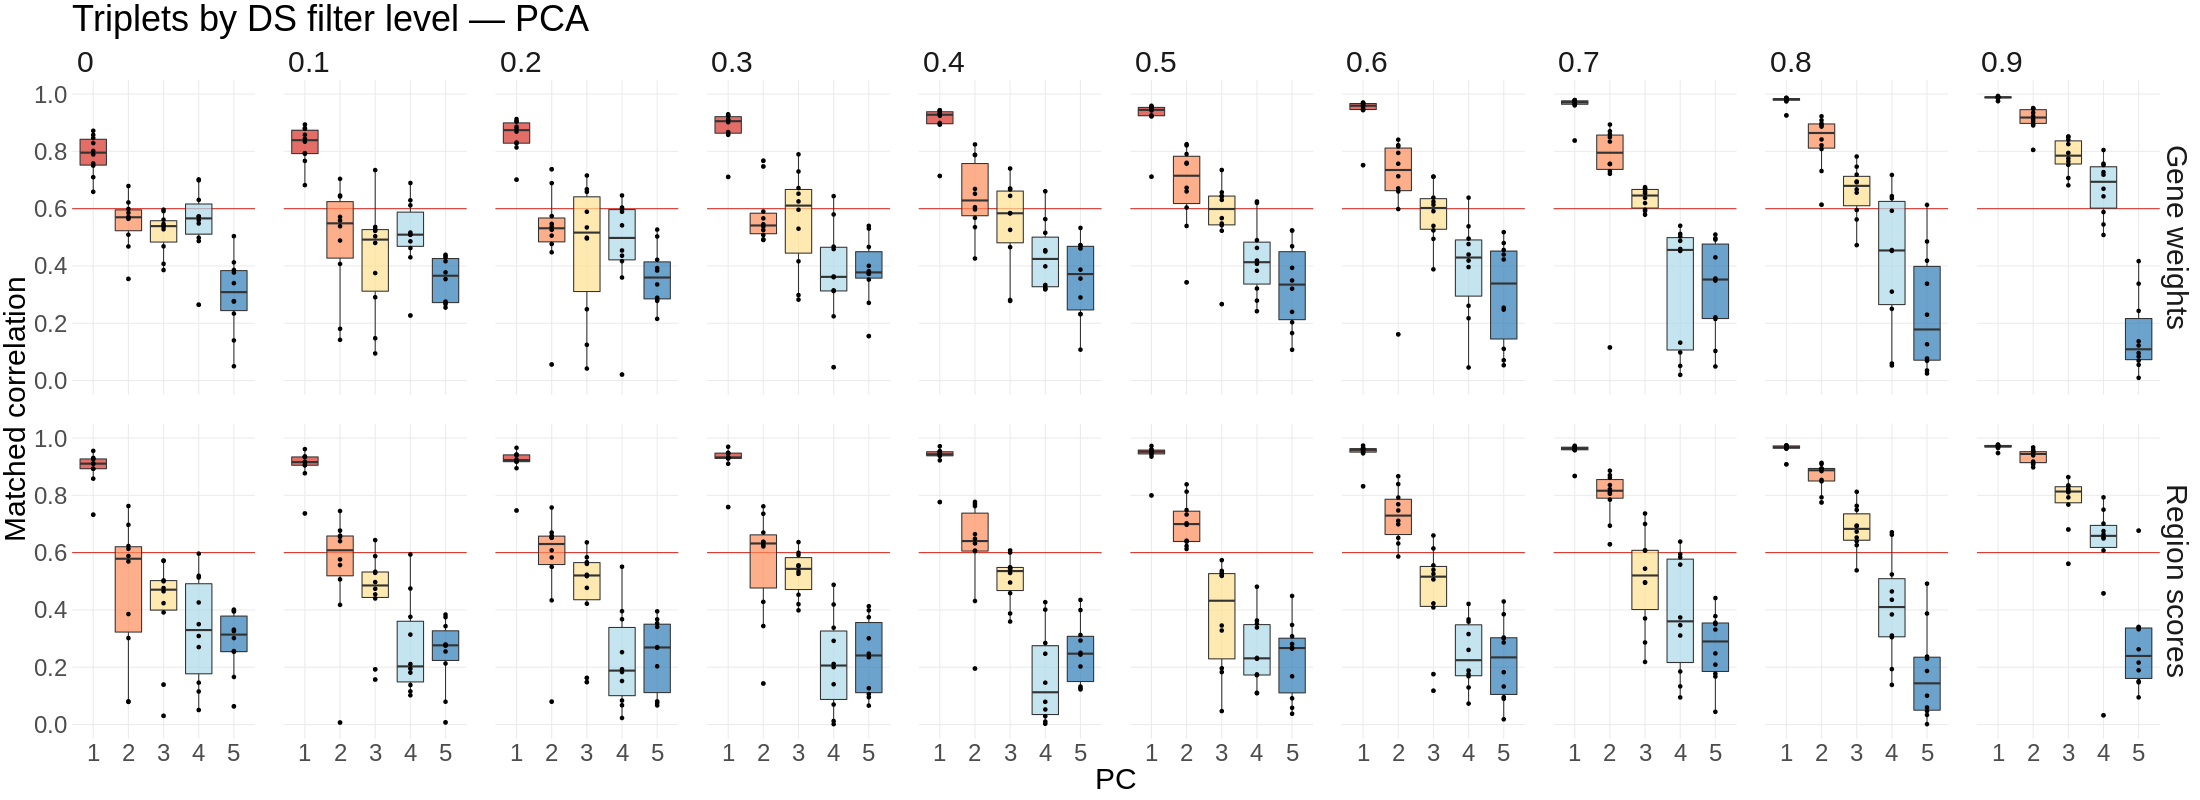

In [317]:
%%R -w 2200 -h 800 -i triplet_versions
plot_triplets(triplet_versions) + ggtitle('Triplets by DS filter level — PCA') & theme(text=element_text(size=30))

## Gradient versions

In [338]:
pca_linear = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='pca'), with_coefs=False)
# pca_kernel = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='pca', kernel='gaussian'), with_coefs=False)
diffmap_cosine_norm = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
diffmap_gaussian = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='gaussian', alpha=1), with_coefs=False)
diffmap_gaussian_gamma = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='gaussian', gamma=1/600, alpha=1), with_coefs=False)

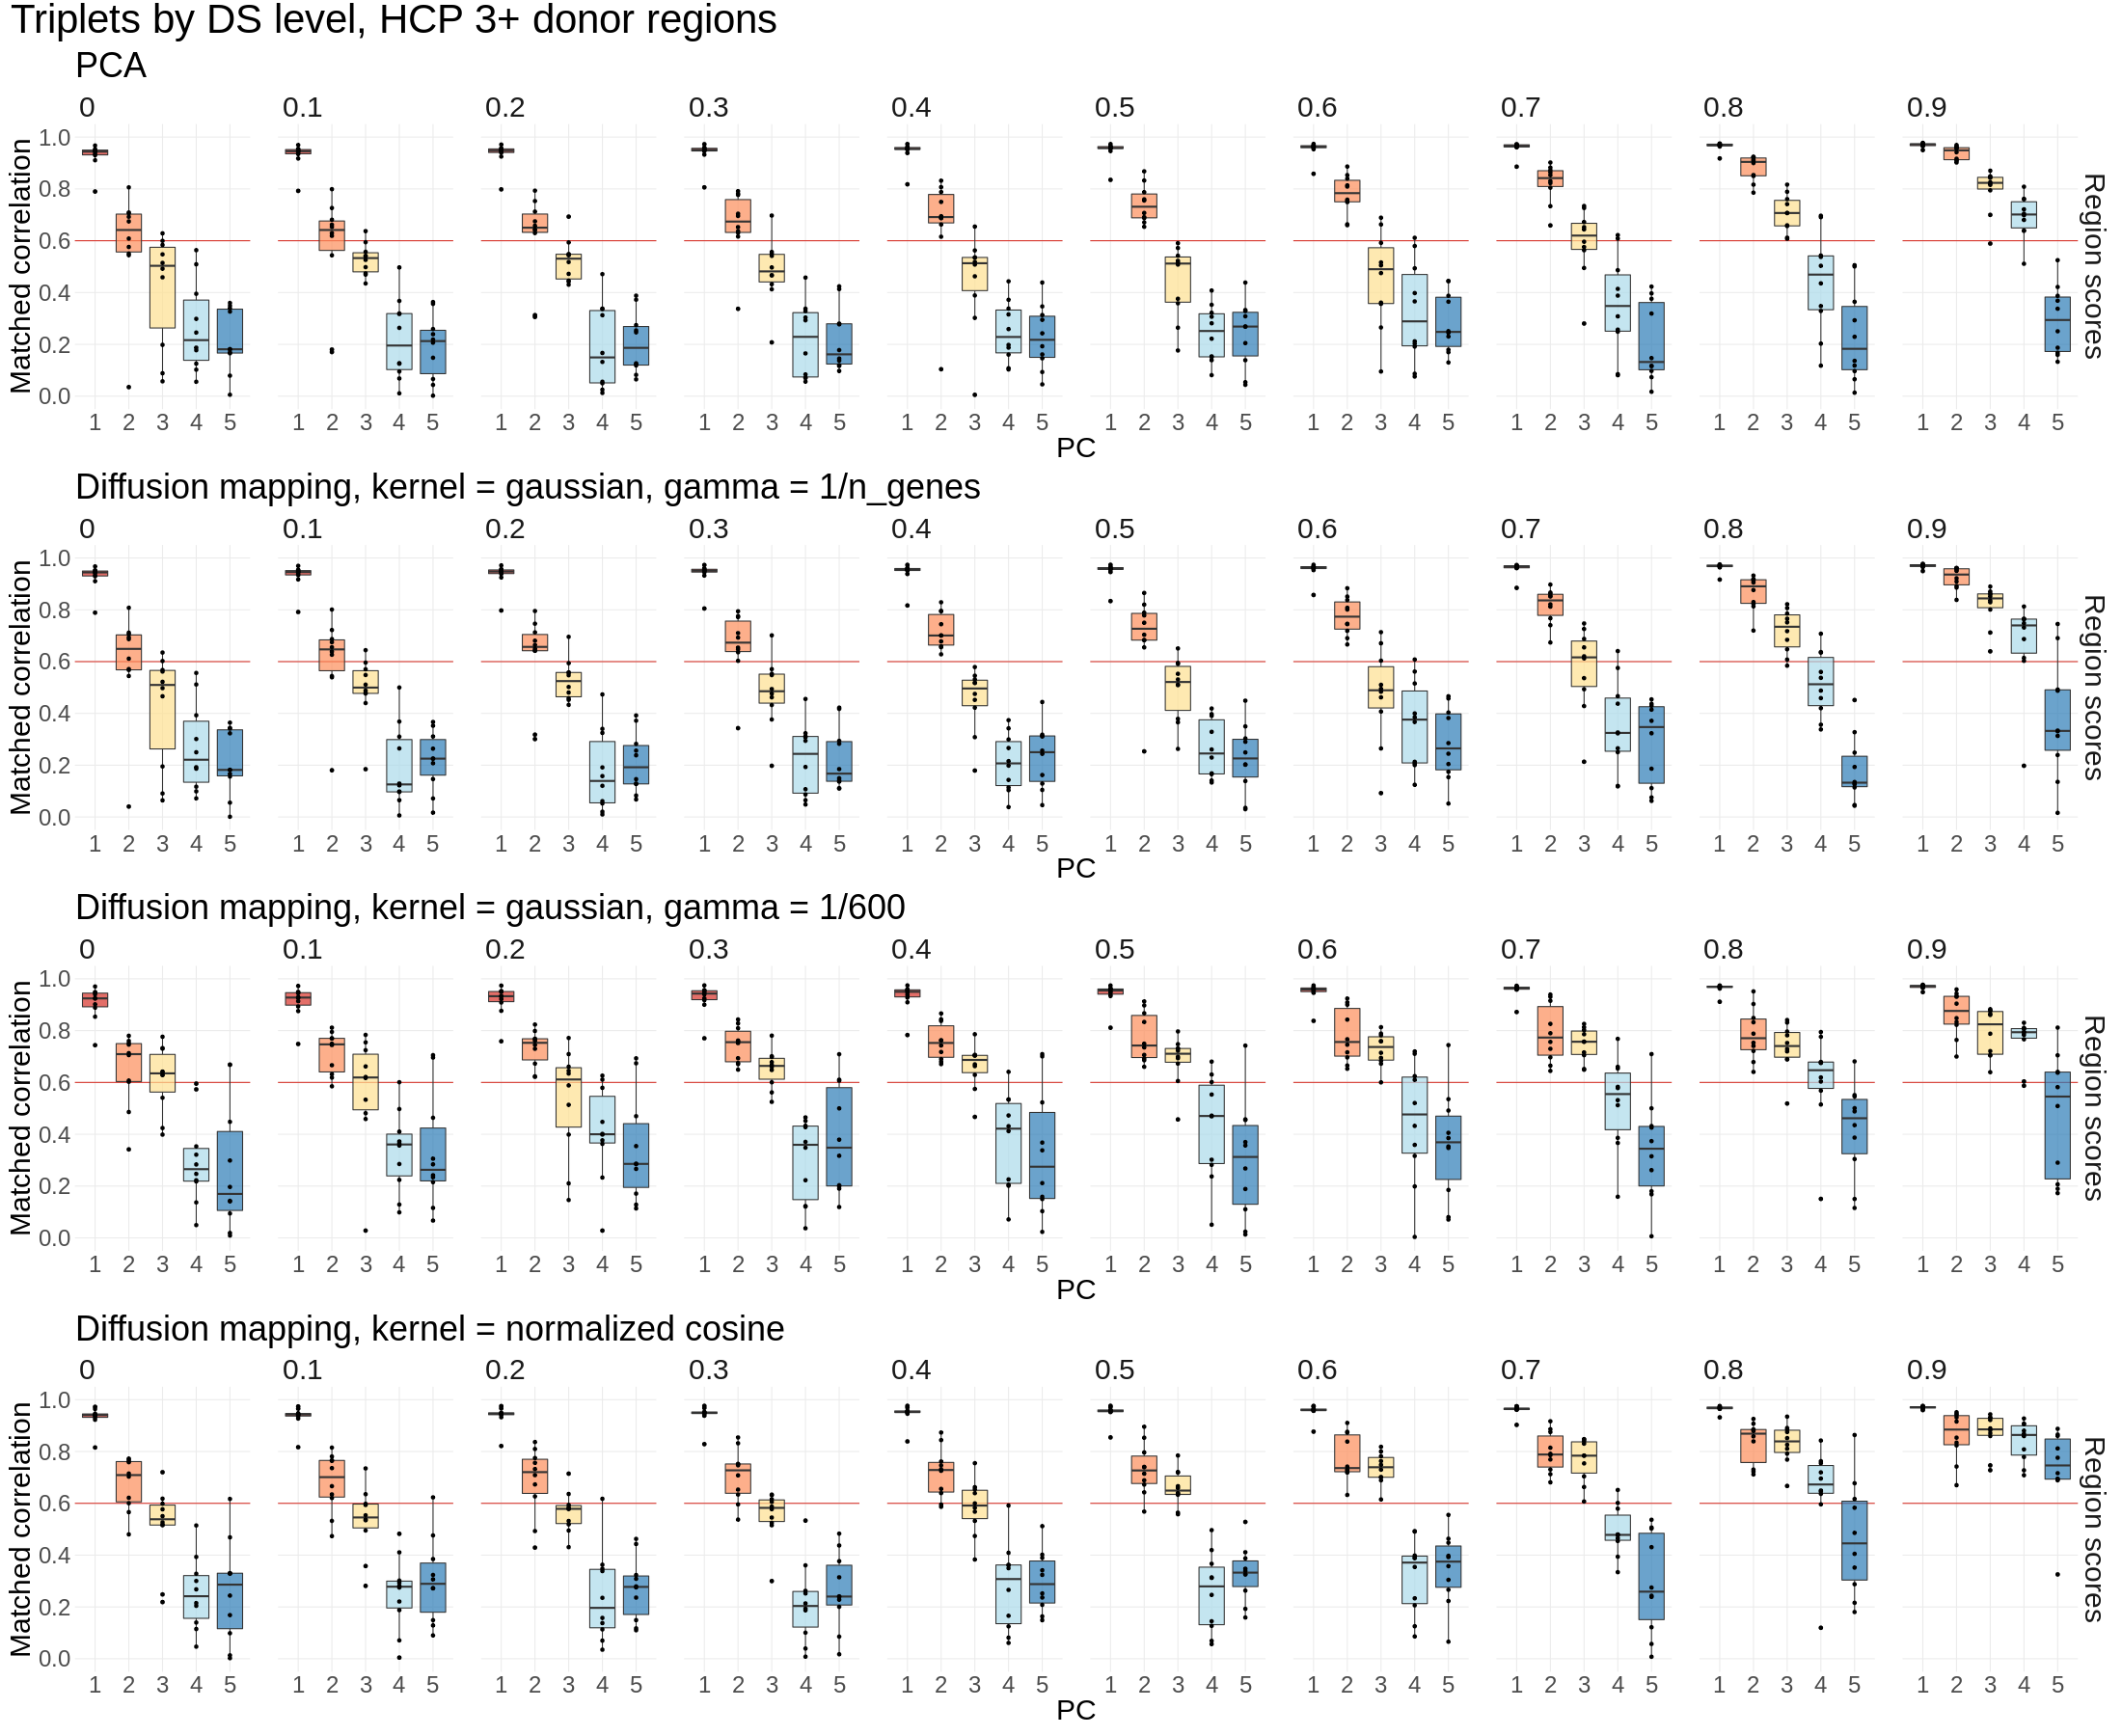

In [340]:
%%R -w 2200 -h 1800 -i pca_linear -i pca_kernel -i diffmap_cosine_norm -i diffmap_gaussian -i diffmap_gaussian_gamma
g1 <- plot_triplets(pca_linear) + ggtitle('PCA')
# g2 <- plot_triplets(pca_kernel) + ggtitle('Triplets by DS level — kernel PCA, kernel = normalized cosine')
g3 <- plot_triplets(diffmap_gaussian) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/n_genes')
g4 <- plot_triplets(diffmap_gaussian_gamma) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/600')
g5 <- plot_triplets(diffmap_cosine_norm) + ggtitle('Diffusion mapping, kernel = normalized cosine') 

((g1 / g3 / g4 / g5) & theme(text=element_text(size=30))) + 
plot_annotation(title='Triplets by DS level, HCP 3+ donor regions', theme = theme(plot.title = element_text(size = 42)))

## Varying alpha? Alpha = 1 is best

In [330]:
# pca_linear = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='pca'), with_coefs=False)
# pca_kernel = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='pca', kernel='gaussian'), with_coefs=False)
diffmap_cosine_norm_alpha5 = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=.5), with_coefs=False)
diffmap_cosine_norm_alpha0 = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=0), with_coefs=False)
diffmap_cosine_norm_alpha10 = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
# diffmap_gaussian = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='gaussian'), with_coefs=False)
# diffmap_gaussian_gamma = make_triplet_ds_plot(get_triplets_ds_levels(use_gradientVersion=True, approach='dm', kernel='gaussian', gamma=1/600), with_coefs=False)

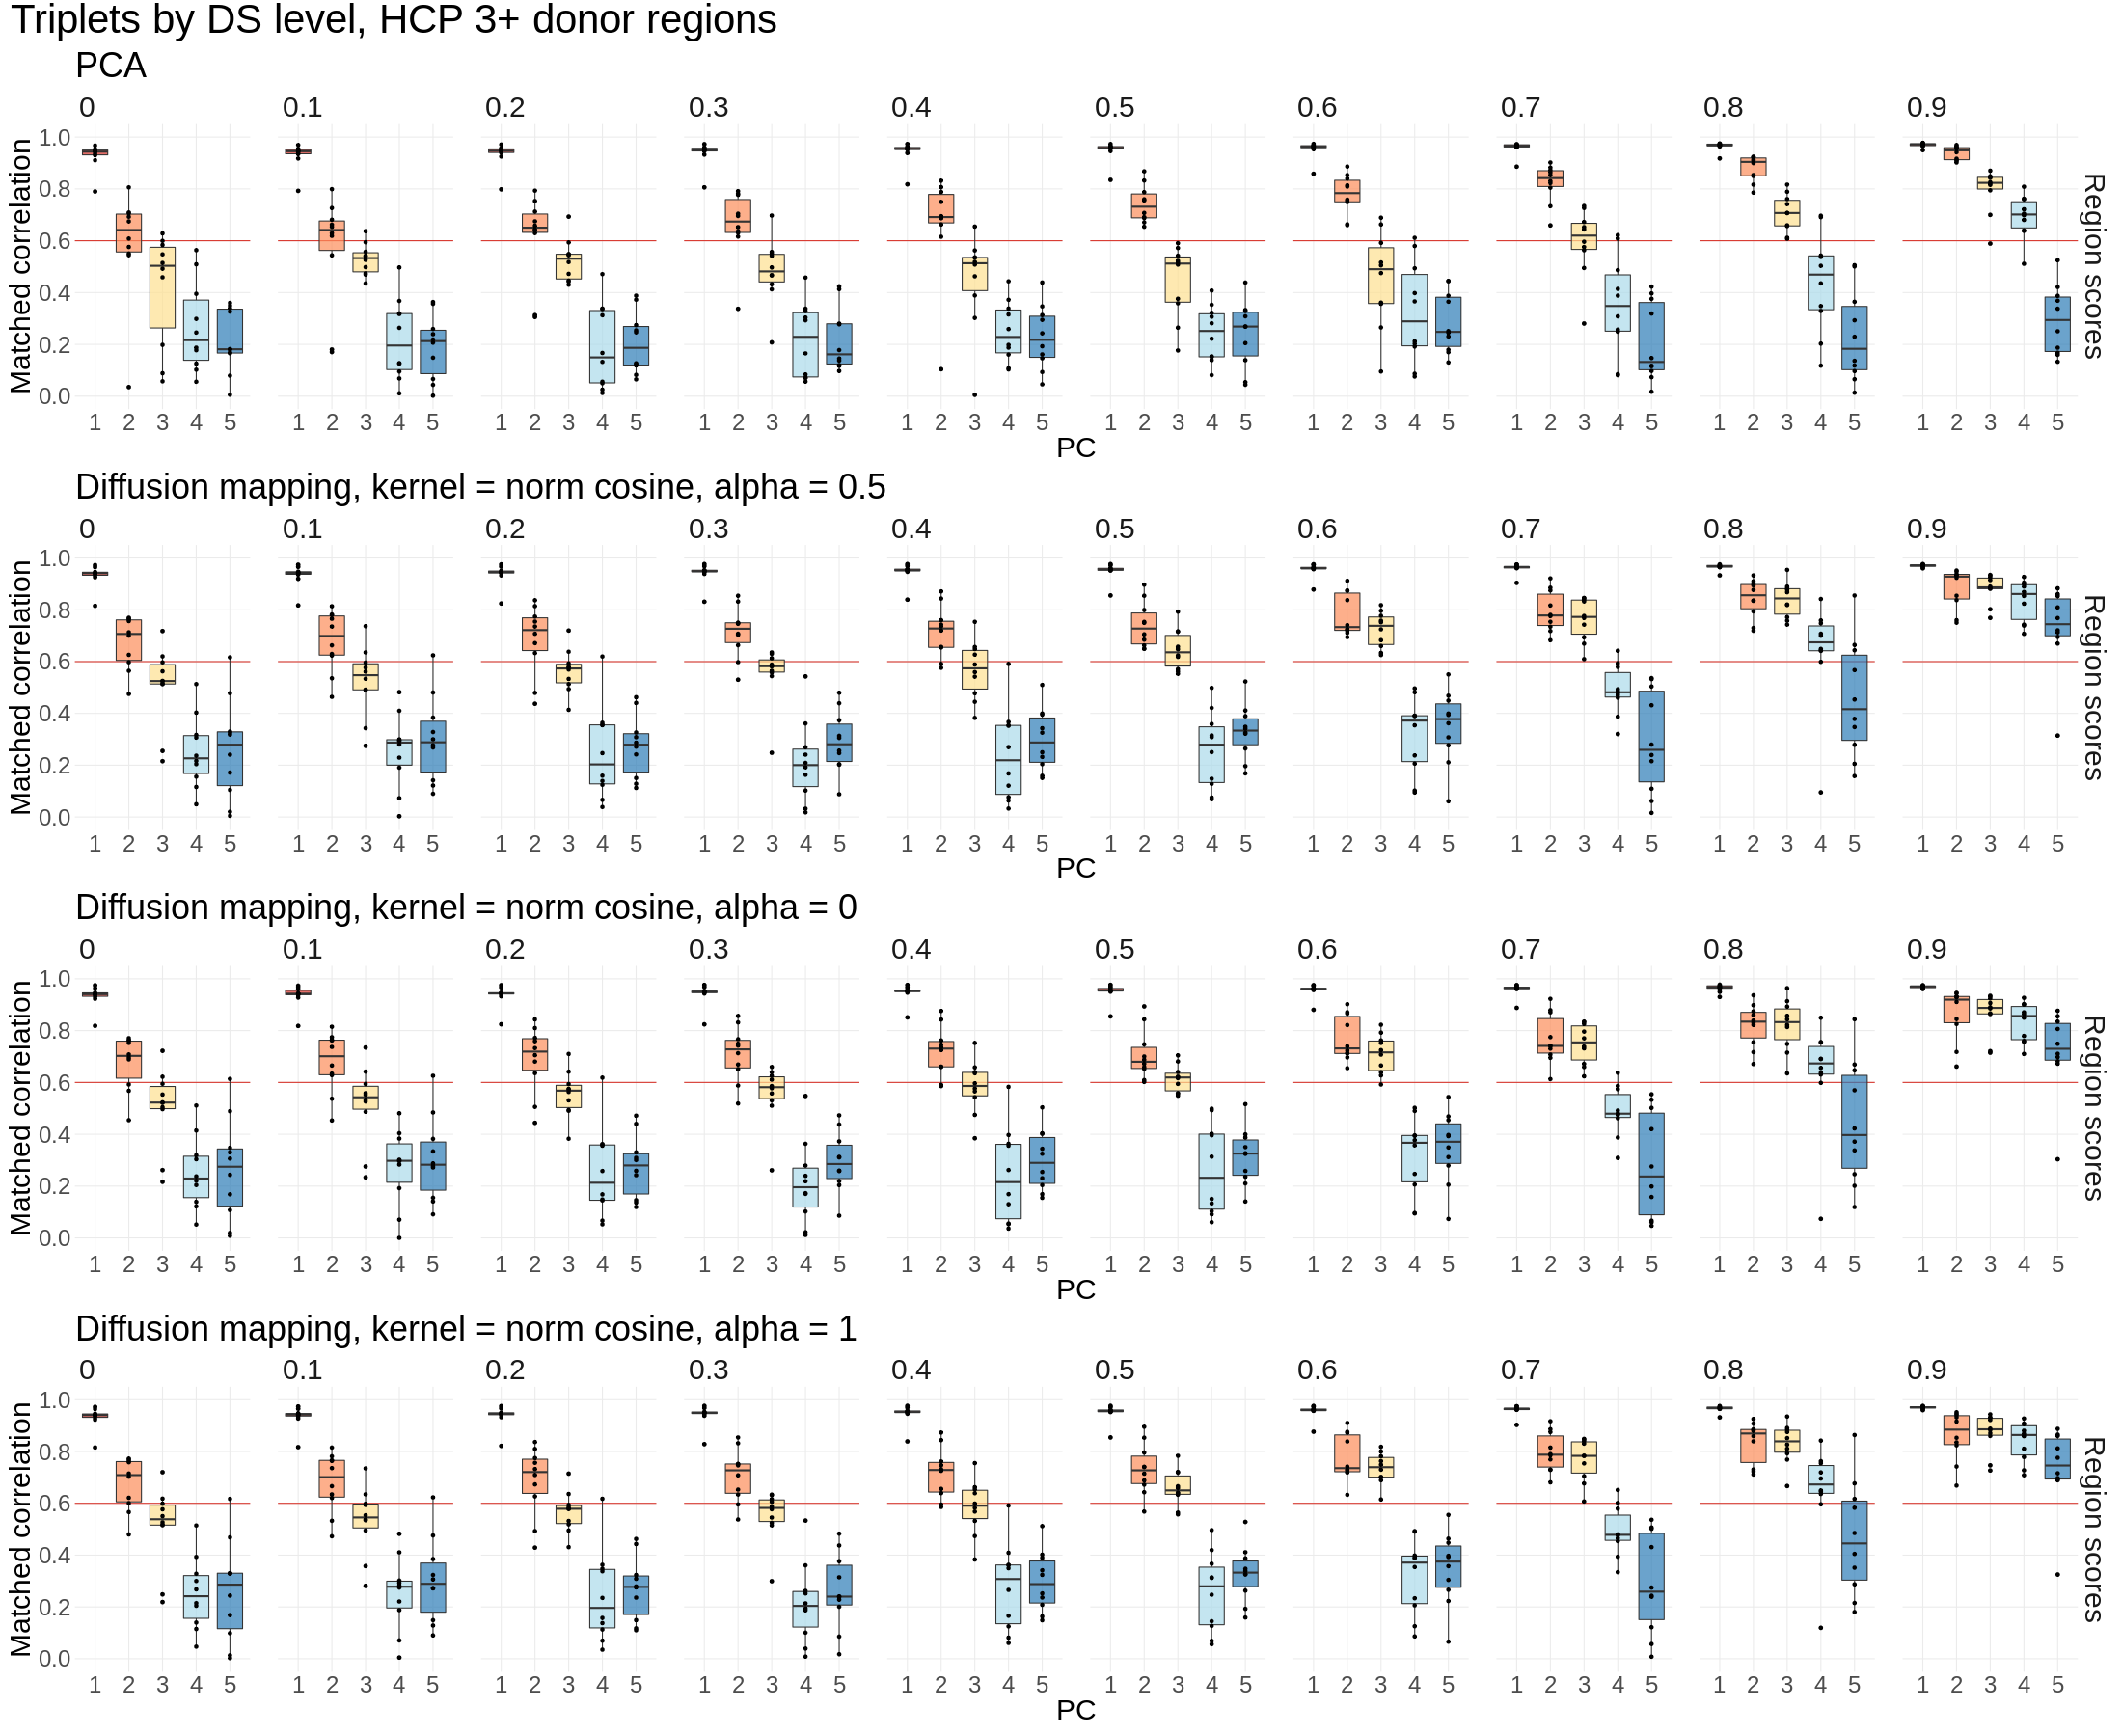

In [332]:
%%R -w 2200 -h 1800 -i pca_linear -i pca_kernel -i diffmap_cosine_norm_alpha5 -i diffmap_cosine_norm_alpha0 -i diffmap_cosine_norm_alpha10
g1 <- plot_triplets(pca_linear) + ggtitle('PCA')
# g2 <- plot_triplets(pca_kernel) + ggtitle('Triplets by DS level — kernel PCA, kernel = normalized cosine')
g3 <- plot_triplets(diffmap_cosine_norm_alpha5) + ggtitle('Diffusion mapping, kernel = norm cosine, alpha = 0.5')
g4 <- plot_triplets(diffmap_cosine_norm_alpha0) + ggtitle('Diffusion mapping, kernel = norm cosine, alpha = 0')
g5 <- plot_triplets(diffmap_cosine_norm_alpha10) + ggtitle('Diffusion mapping, kernel = norm cosine, alpha = 1') 

((g1 / g3 / g4 / g5) & theme(text=element_text(size=30))) + 
plot_annotation(title='Triplets by DS level, HCP 3+ donor regions', theme = theme(plot.title = element_text(size = 42)))

## Gradient versions in MNI

In [171]:
# triplets_hcp_mni = load_pickle("triplets_hcp_mni")
triplets_hcp_mni_3donors = load_pickle("triplets_hcp_mni_3donors")

In [341]:
pca_linear = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_mni_3donors, use_gradientVersion=True, approach='pca'), with_coefs=False)
diffmap_cosine_norm = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_mni_3donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
diffmap_gaussian = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_mni_3donors, use_gradientVersion=True, approach='dm', kernel='gaussian', alpha=1), with_coefs=False)
# diffmap_gaussian_gamma = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_mni_3donors, use_gradientVersion=True, approach='dm', kernel='gaussian', gamma=1/600, alpha=1), with_coefs=False)

/home/rajd2/.local/lib/python3.8/site-packages/brainspace/gradient/embedding.py:77: UserWarning: Graph is not fully connected.
  warnings.warn('Graph is not fully connected.')


ArpackNoConvergence: ARPACK error -1: No convergence (661 iterations, 0/6 eigenvectors converged)

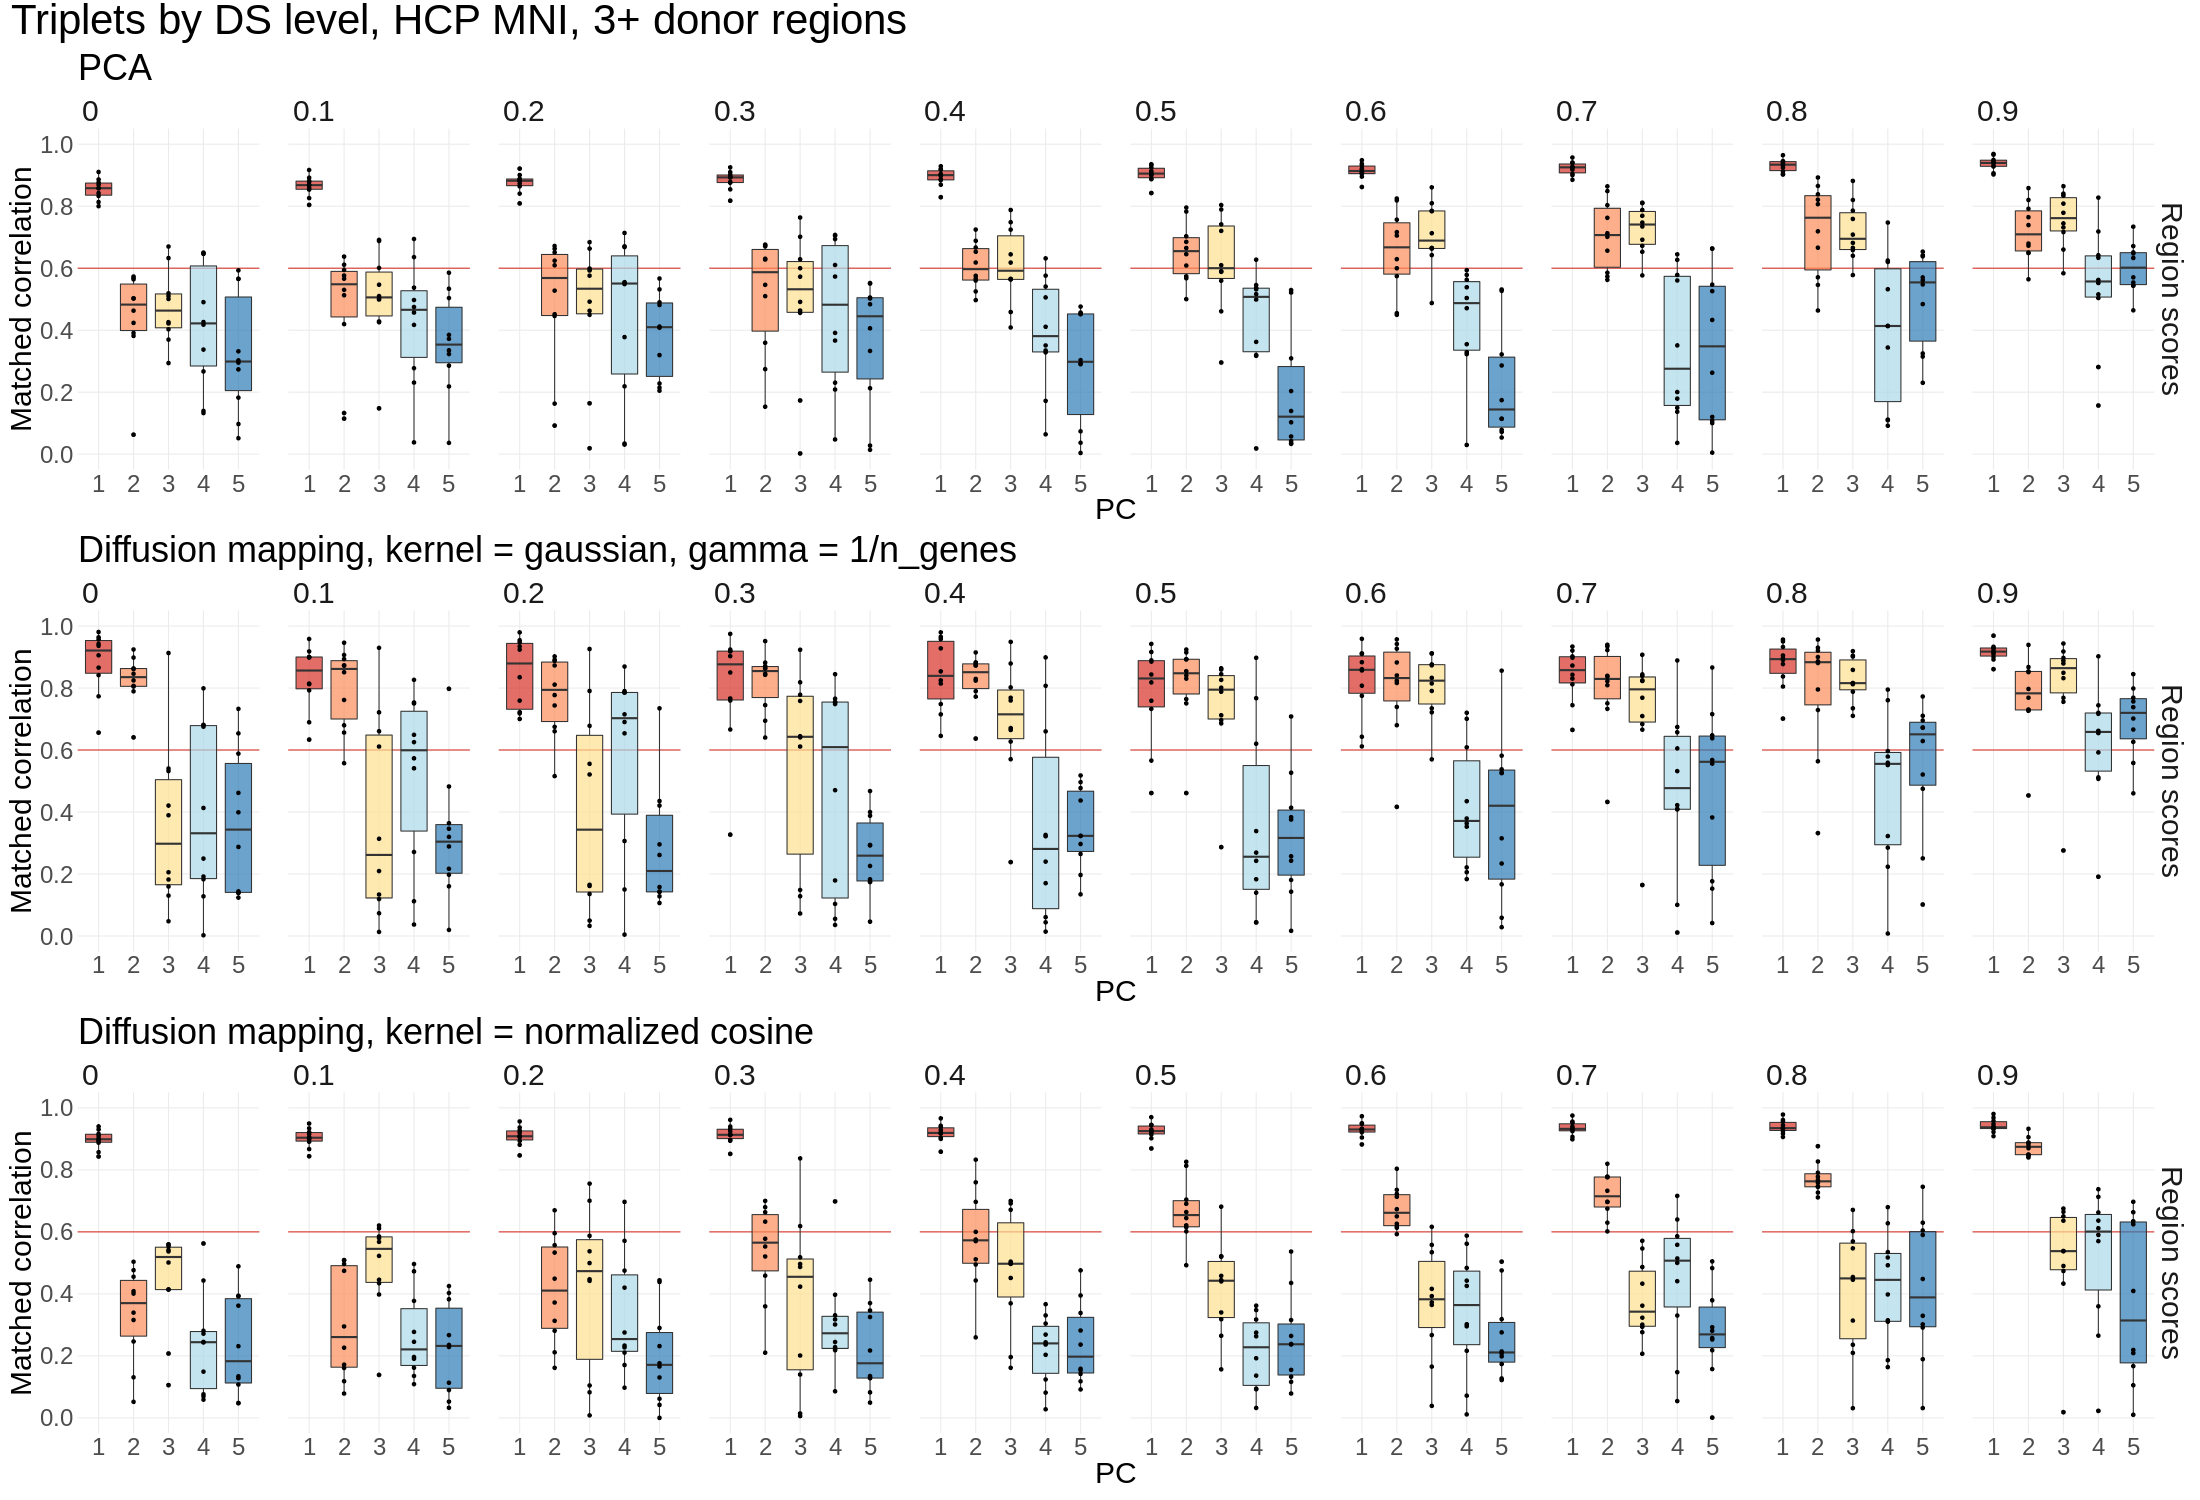

In [342]:
%%R -w 2200 -h 1500 -i pca_linear -i pca_kernel -i diffmap_cosine_norm -i diffmap_gaussian
g1 <- plot_triplets(pca_linear) + ggtitle('PCA')
# g2 <- plot_triplets(pca_kernel) + ggtitle('Triplets by DS level — kernel PCA, kernel = normalized cosine')
g3 <- plot_triplets(diffmap_gaussian) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/n_genes')
# g4 <- plot_triplets(diffmap_gaussian_gamma) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/600')
g5 <- plot_triplets(diffmap_cosine_norm) + ggtitle('Diffusion mapping, kernel = normalized cosine') 

((g1 / g3 / g5) & theme(text=element_text(size=30))) + 
plot_annotation(title='Triplets by DS level, HCP MNI, 3+ donor regions', theme = theme(plot.title = element_text(size = 42)))

## 2-donors rather than 3-donors?

In [343]:
pca_linear = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='pca'), with_coefs=False)
diffmap_cosine_norm = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
diffmap_gaussian = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='gaussian', alpha=1), with_coefs=False)
diffmap_gaussian_gamma = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='gaussian', gamma=1/600, alpha=1), with_coefs=False)

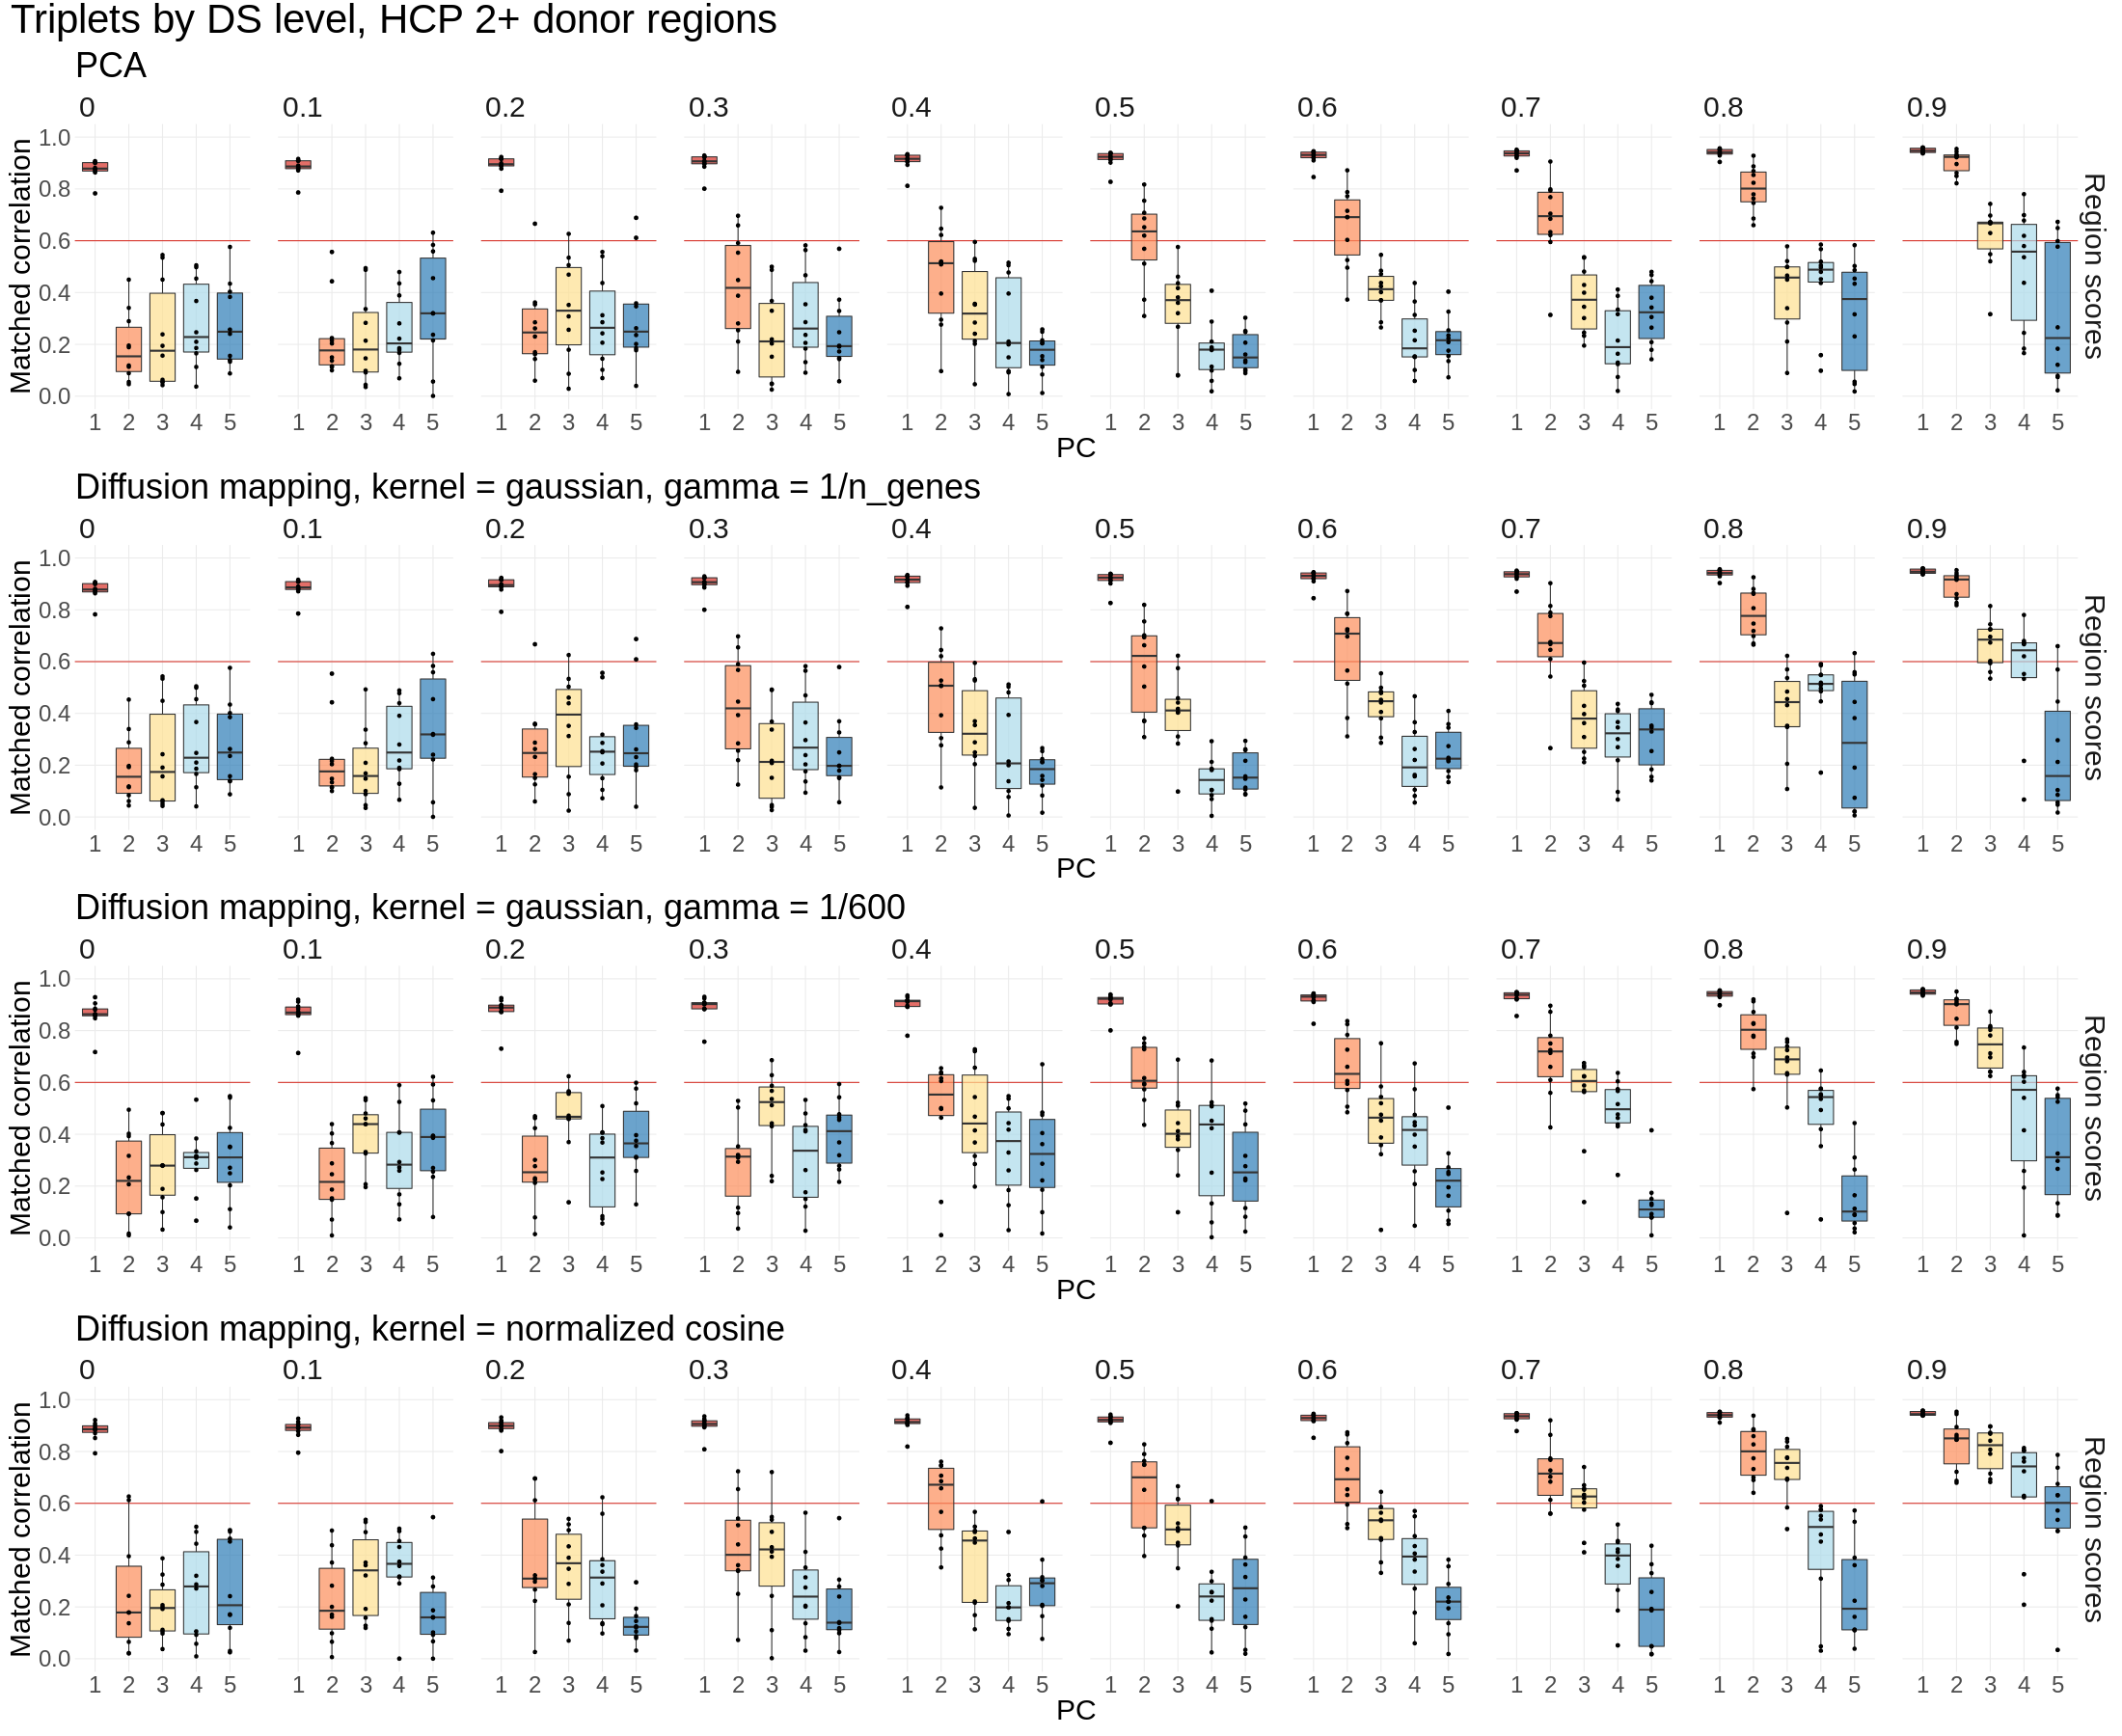

In [345]:
%%R -w 2200 -h 1800 -i pca_linear -i pca_kernel -i diffmap_cosine_norm -i diffmap_gaussian -i diffmap_gaussian_gamma
g1 <- plot_triplets(pca_linear) + ggtitle('PCA')
# g2 <- plot_triplets(pca_kernel) + ggtitle('Triplets by DS level — kernel PCA, kernel = normalized cosine')
g3 <- plot_triplets(diffmap_gaussian) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/n_genes')
g4 <- plot_triplets(diffmap_gaussian_gamma) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/600')
g5 <- plot_triplets(diffmap_cosine_norm) + ggtitle('Diffusion mapping, kernel = normalized cosine') 

((g1 / g3 / g4 / g5) & theme(text=element_text(size=30))) + 
plot_annotation(title='Triplets by DS level, HCP 2+ donor regions', theme = theme(plot.title = element_text(size = 42)))

## All regions rather than 3-donors?

In [358]:
pca_linear = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp, use_gradientVersion=True, approach='pca'), with_coefs=False)
diffmap_cosine_norm = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1), with_coefs=False)
diffmap_gaussian = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp, use_gradientVersion=True, approach='dm', kernel='gaussian', alpha=1), with_coefs=False)
diffmap_gaussian_gamma = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp, use_gradientVersion=True, approach='dm', kernel='gaussian', gamma=1/600, alpha=1), with_coefs=False)

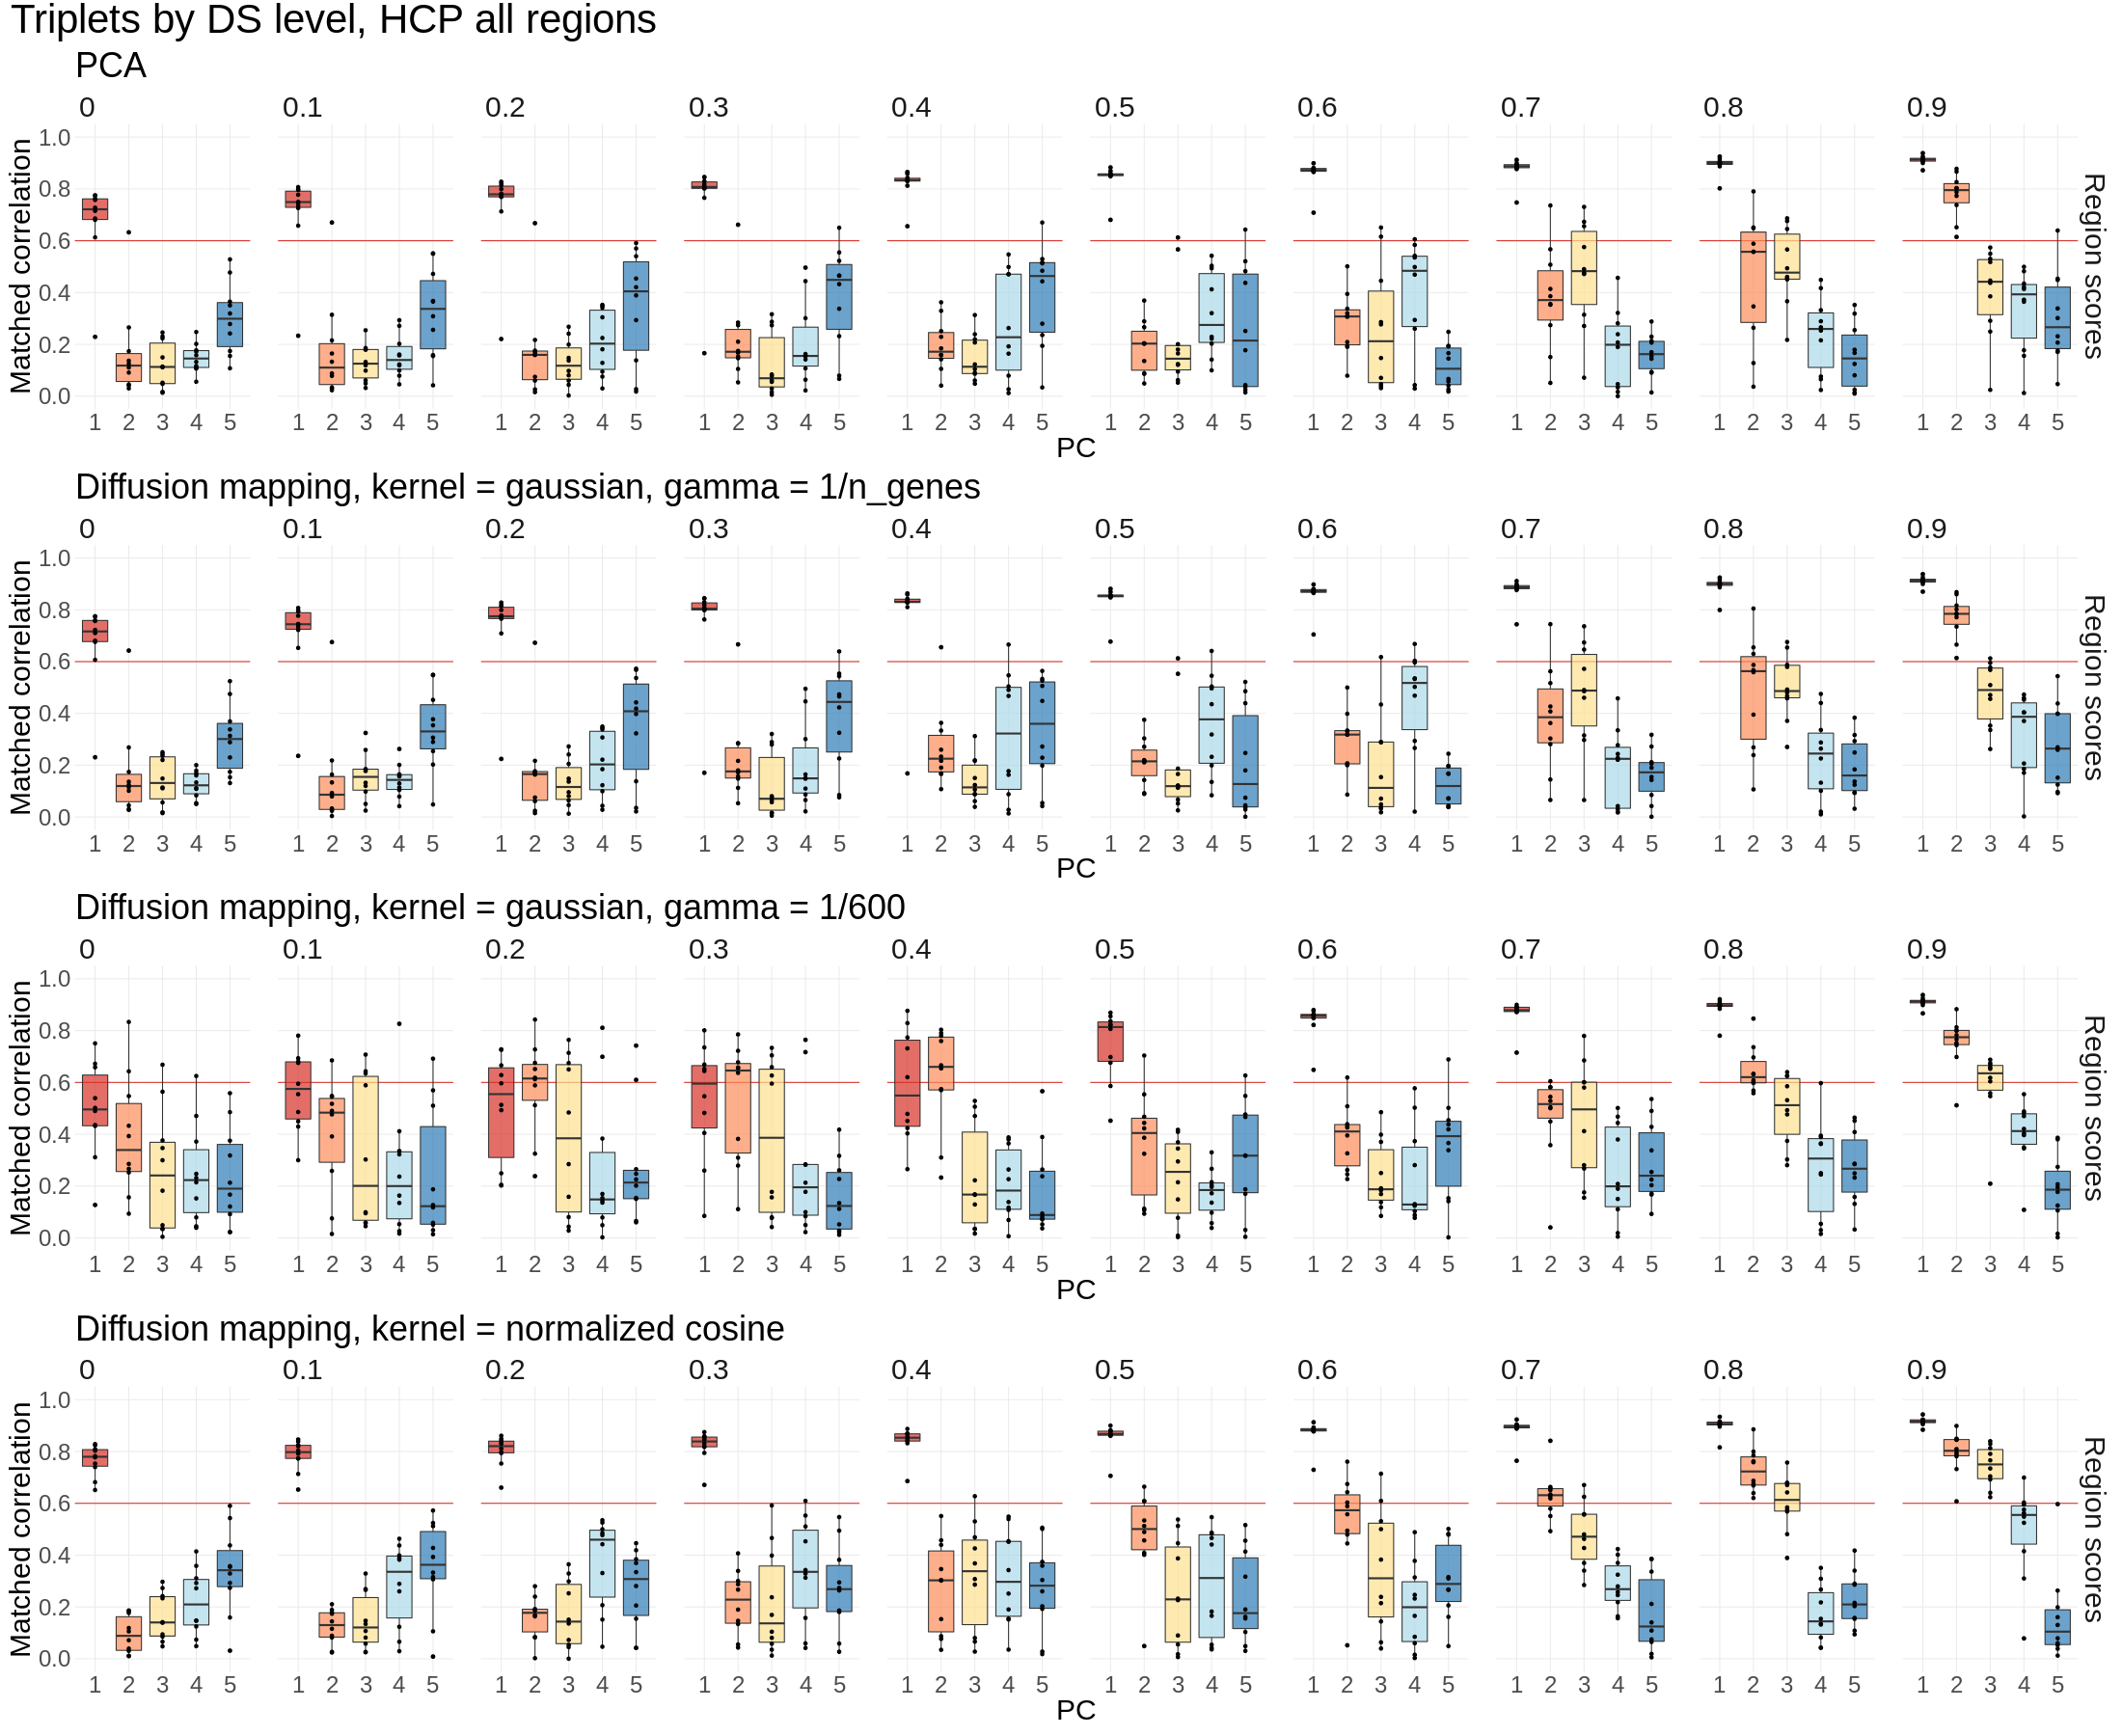

In [359]:
%%R -w 2200 -h 1800 -i pca_linear -i pca_kernel -i diffmap_cosine_norm -i diffmap_gaussian -i diffmap_gaussian_gamma
g1 <- plot_triplets(pca_linear) + ggtitle('PCA')
# g2 <- plot_triplets(pca_kernel) + ggtitle('Triplets by DS level — kernel PCA, kernel = normalized cosine')
g3 <- plot_triplets(diffmap_gaussian) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/n_genes')
g4 <- plot_triplets(diffmap_gaussian_gamma) + ggtitle('Diffusion mapping, kernel = gaussian, gamma = 1/600')
g5 <- plot_triplets(diffmap_cosine_norm) + ggtitle('Diffusion mapping, kernel = normalized cosine') 

((g1 / g3 / g4 / g5) & theme(text=element_text(size=30))) + 
plot_annotation(title='Triplets by DS level, HCP all regions', theme = theme(plot.title = element_text(size = 42)))

## Sparsity? Bad

In [349]:
pca_linear = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='pca'), with_coefs=False)
diffmap_sparse0 = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1, sparsity=0), with_coefs=False)
diffmap_sparse2 = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1, sparsity=0.2), with_coefs=False)
diffmap_sparse5 = make_triplet_ds_plot(get_triplets_ds_levels(triplets_hcp_2donors, use_gradientVersion=True, approach='dm', kernel='normalized_angle', alpha=1, sparsity=0.5), with_coefs=False)

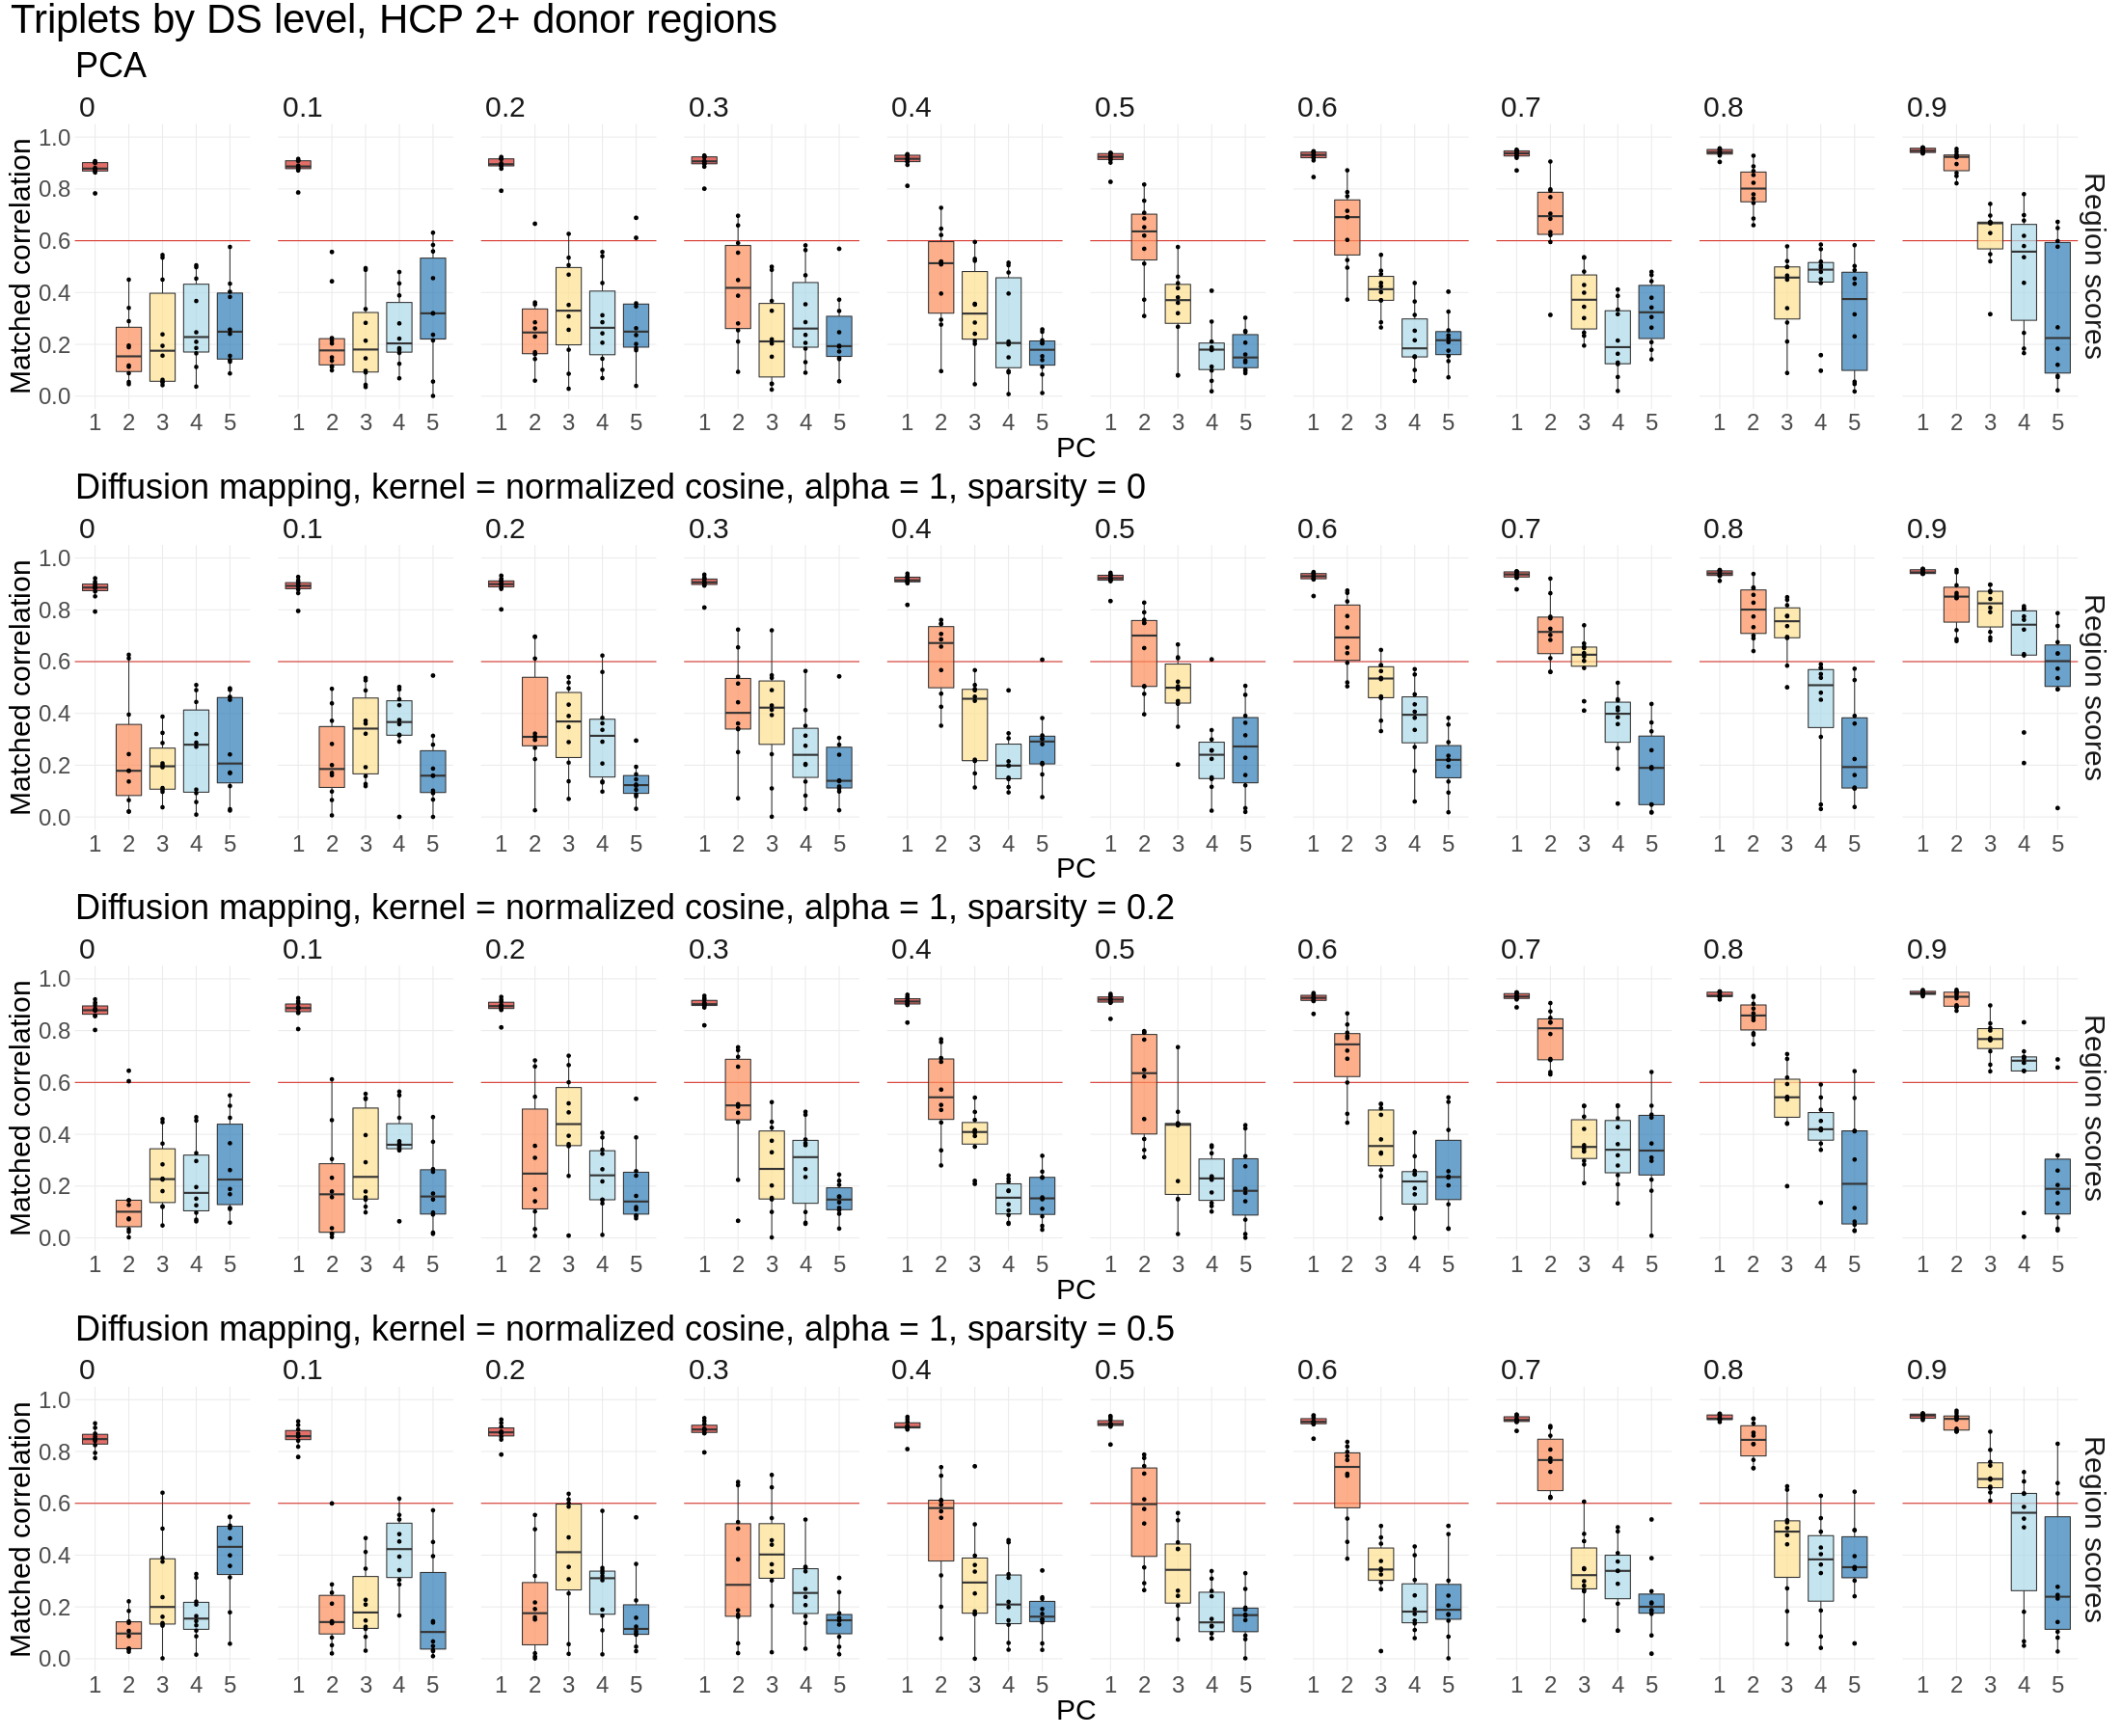

In [350]:
%%R -w 2200 -h 1800 -i pca_linear -i diffmap_sparse0 -i diffmap_sparse2 -i diffmap_sparse5
g1 <- plot_triplets(pca_linear) + ggtitle('PCA')
g2 <- plot_triplets(diffmap_sparse0) + ggtitle('Diffusion mapping, kernel = normalized cosine, alpha = 1, sparsity = 0') 
g3 <- plot_triplets(diffmap_sparse2) + ggtitle('Diffusion mapping, kernel = normalized cosine, alpha = 1, sparsity = 0.2') 
g4 <- plot_triplets(diffmap_sparse5) + ggtitle('Diffusion mapping, kernel = normalized cosine, alpha = 1, sparsity = 0.5')

((g1 / g2 / g3 / g4) & theme(text=element_text(size=30))) + 
plot_annotation(title='Triplets by DS level, HCP 2+ donor regions', theme = theme(plot.title = element_text(size = 42)))

---

# Plot the brains

In [360]:
hcp_ds9 = get_expression_abagen(atlas=fetch_hcp(), DS_threshold=0.9, donors_threshold=1, save_name='hcp_ds9')

1595 genes remain after filtering for top 0.1 differential stability


In [376]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"

hcp_3donors_ds5 = pd.read_csv(data_dir + 'hcp_3donors_ds5.csv', index_col=0)
hcp_3donors_ds6 = pd.read_csv(data_dir + 'hcp_3donors_ds6.csv', index_col=0)
hcp_2donors_ds8 = pd.read_csv(data_dir + 'hcp_2donors_ds8.csv', index_col=0)
hcp_3donors_ds8 = pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0)

hcp_3donors_ds9 = pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0)
hcp_2donors_ds9 = pd.read_csv(data_dir + 'hcp_2donors_ds9.csv', index_col=0)

pca_hcp_3d_ds9 = pcaVersion(hcp_3donors_ds9, scale=False)
dm_hcp_3d_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_3donors_ds9)
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_3donors_ds5)
dm_hcp_3d_ds6 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_3donors_ds6)
dm_hcp_2d_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_2donors_ds9)
dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_ds9)
# hcp_3donors_ds8 = gradientVersion(approach='pca').fit(exp_3donors_ds8)
# hcp_3donors_ds8_dm = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(exp_3donors_ds8)
# hcp_3donors_ds5_dm = gradientVersion(approach='dm', kernel='normalized_angle').fit(exp_3donors_ds5)
# hcp_3donors_ds6_dm = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(exp_3donors_ds6)
# hcp_2donors_ds8 = gradientVersion(approach='pca').fit(exp_2donors_ds8)
# hcp_2donors_ds8_dm = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(exp_2donors_ds8)

New PCA version
New gradients version: method=dm, sparsity=0, kernel=normalized_angle
New gradients version: method=dm, sparsity=0, kernel=normalized_angle
New gradients version: method=dm, sparsity=0, kernel=normalized_angle
New gradients version: method=dm, sparsity=0, kernel=normalized_angle
New gradients version: method=dm, sparsity=0, kernel=normalized_angle


In [384]:
def flip_scores(scores, ix_flip):
    scores_flip = scores.copy()
    scores_flip.iloc[:, ix_flip] *= -1
    return scores_flip

scores_dict = {
    'PCA 3+ donors DS 0.9': pca_hcp_3d_ds9.scores,
    'DM 3+ donors DS 0.5': dm_hcp_3d_ds5.scores.pipe(flip_scores, ix_flip=[3]),
    # 'DM 3+ donors DS 0.6': dm_hcp_3d_ds6.scores.pipe(flip_scores, ix_flip=[]),
    # 'DM 3+ donors DS 0.9': dm_hcp_3d_ds9.scores.pipe(flip_scores, ix_flip=[1]),
    # 'DM 2+ donors DS 0.9': dm_hcp_2d_ds9.scores.pipe(flip_scores, ix_flip=[1]),
    'DM DS 0.9': dm_hcp_ds9.scores.pipe(flip_scores, ix_flip=[1])
}

scores_df = (pd.concat(scores_dict)
             .groupby(level=0)
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             .reset_index(level=0).rename({'level_0':'version'},axis=1)
             .join(get_labels_hcp())
                  )

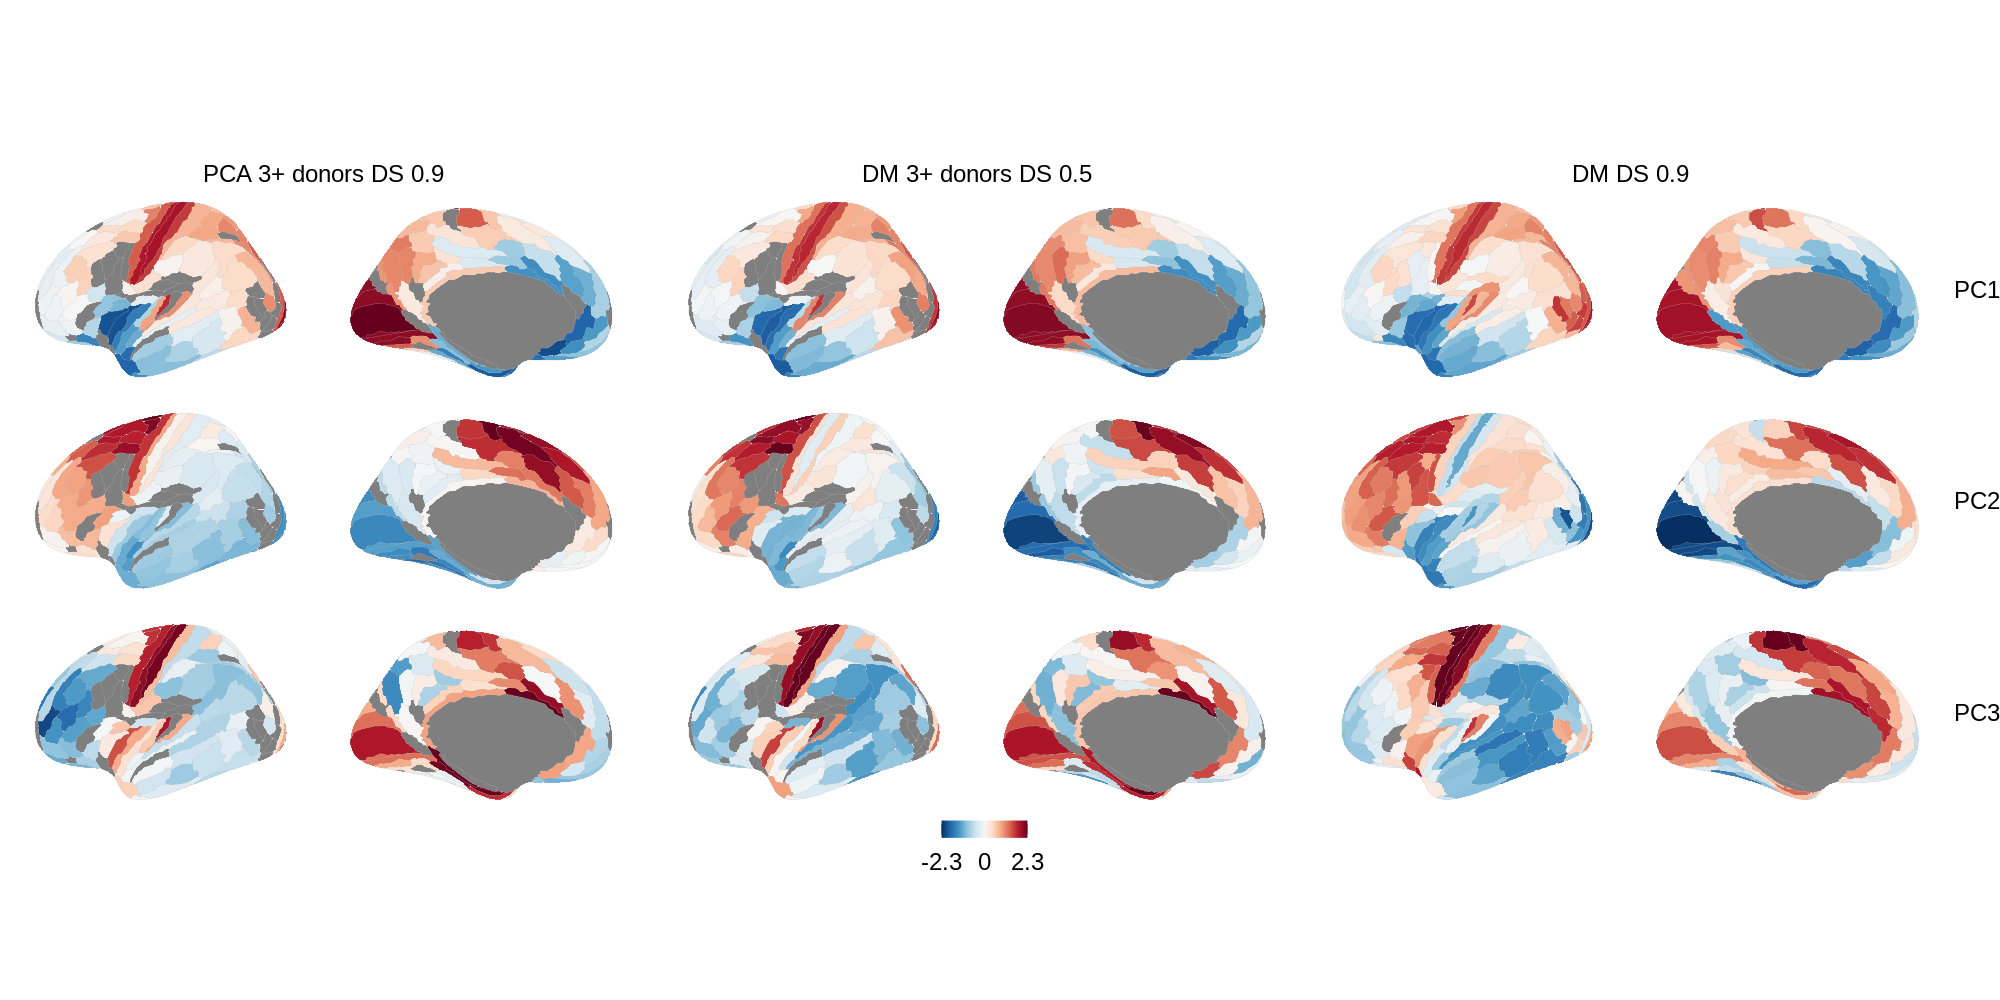

In [385]:
%%R -i scores_df -w 2000 -h 1000
source("../code/brainPlots.R")
plot_hcp(scores_df, three=T) + theme(text=element_text(size=30))

---

---

# Gene-PC region correlation vs coefs

In [217]:
gene_region_corrs = correlate(hcp_3donors_ds8.scores, hcp_3donors_ds8.expression)

In [264]:
coefs = (hcp_3donors_ds8.coefs.T
         .iloc[:,:3].set_axis(['PC1','PC2','PC3'],axis=1)
         .melt(ignore_index=False, var_name='PC', value_name='coef')
         .set_index('PC', append=True)
        )
corrs = (gene_region_corrs.T
         .iloc[:,:3].set_axis(['PC1','PC2','PC3'],axis=1)
         .melt(ignore_index=False, var_name='PC', value_name='corr')
         .set_index('PC', append=True)
        )

df_coef_corrs = coefs.join(corrs).reset_index()
df_coef_corrs.head()

level_0   PC      coef      corr
0    A1BG  PC1 -0.019914 -0.807991
1   ABCA6  PC1  0.017265  0.761945
2   ABCA9  PC1  0.016686  0.738792
3  ABCC12  PC1 -0.005588 -0.237055
4   ABCC5  PC1  0.007686  0.359591

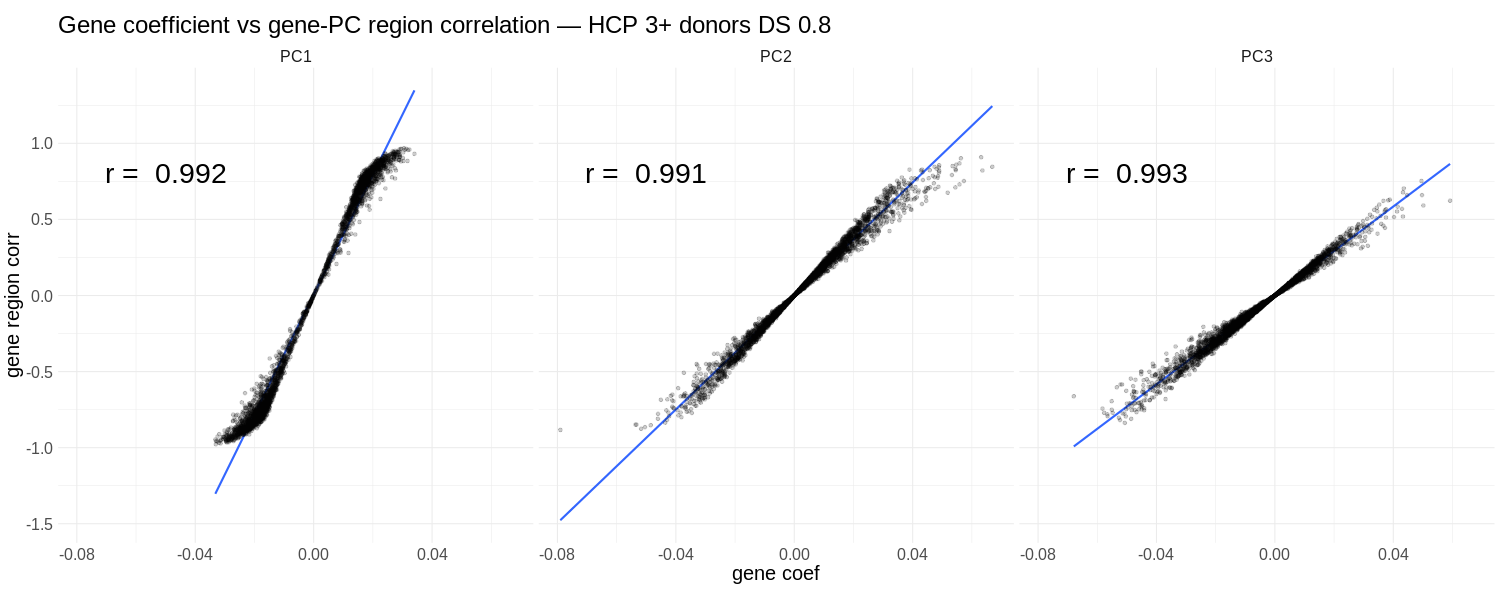

In [277]:
%%R -i df_coef_corrs -w 1500 -h 600

r = df_coef_corrs %>% group_by(PC) %>% summarize(r=cor(coef, corr))

ggplot(df_coef_corrs, aes(coef, corr)) + 
facet_wrap(~PC) +
geom_smooth(method='lm') +
geom_point(alpha=.2) + 
geom_text(data=r, aes(x=-.05, y=.8, label=paste('r = ', round(r,3))), size=10) +
labs(x='gene coef', y='gene region corr') +
ggtitle('Gene coefficient vs gene-PC region correlation — HCP 3+ donors DS 0.8') +
theme_minimal() + 
theme(aspect.ratio=1, text=element_text(size=20))

## Can we recover DM maps by using the gene correlations as if they were PC weights?

In [298]:
gene_region_corrs = correlate(hcp_2donors_ds8_dm.scores, hcp_2donors_ds8_dm.expression)

In [312]:
scores_projected = (exp_2donors_ds8 @ gene_region_corrs.T).dropna()
scores_dict = {
    'DM 2+ donors DS 0.8': hcp_2donors_ds8_dm.scores.pipe(flip_scores, ix_flip=1),
    'Proejct gene-region corrs as linear weights': scores_projected.pipe(flip_scores, ix_flip=1)
}

scores_df = (pd.concat(scores_dict)
             .groupby(level=0)
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             .reset_index(level=0).rename({'level_0':'version'},axis=1)
             .join(get_labels_hcp())
                  )

In [313]:
scores_projected.corrwith(hcp_2donors_ds8_dm.scores)

0    0.995357
1    0.952210
2    0.910608
3    0.856906
4    0.771312
dtype: float64

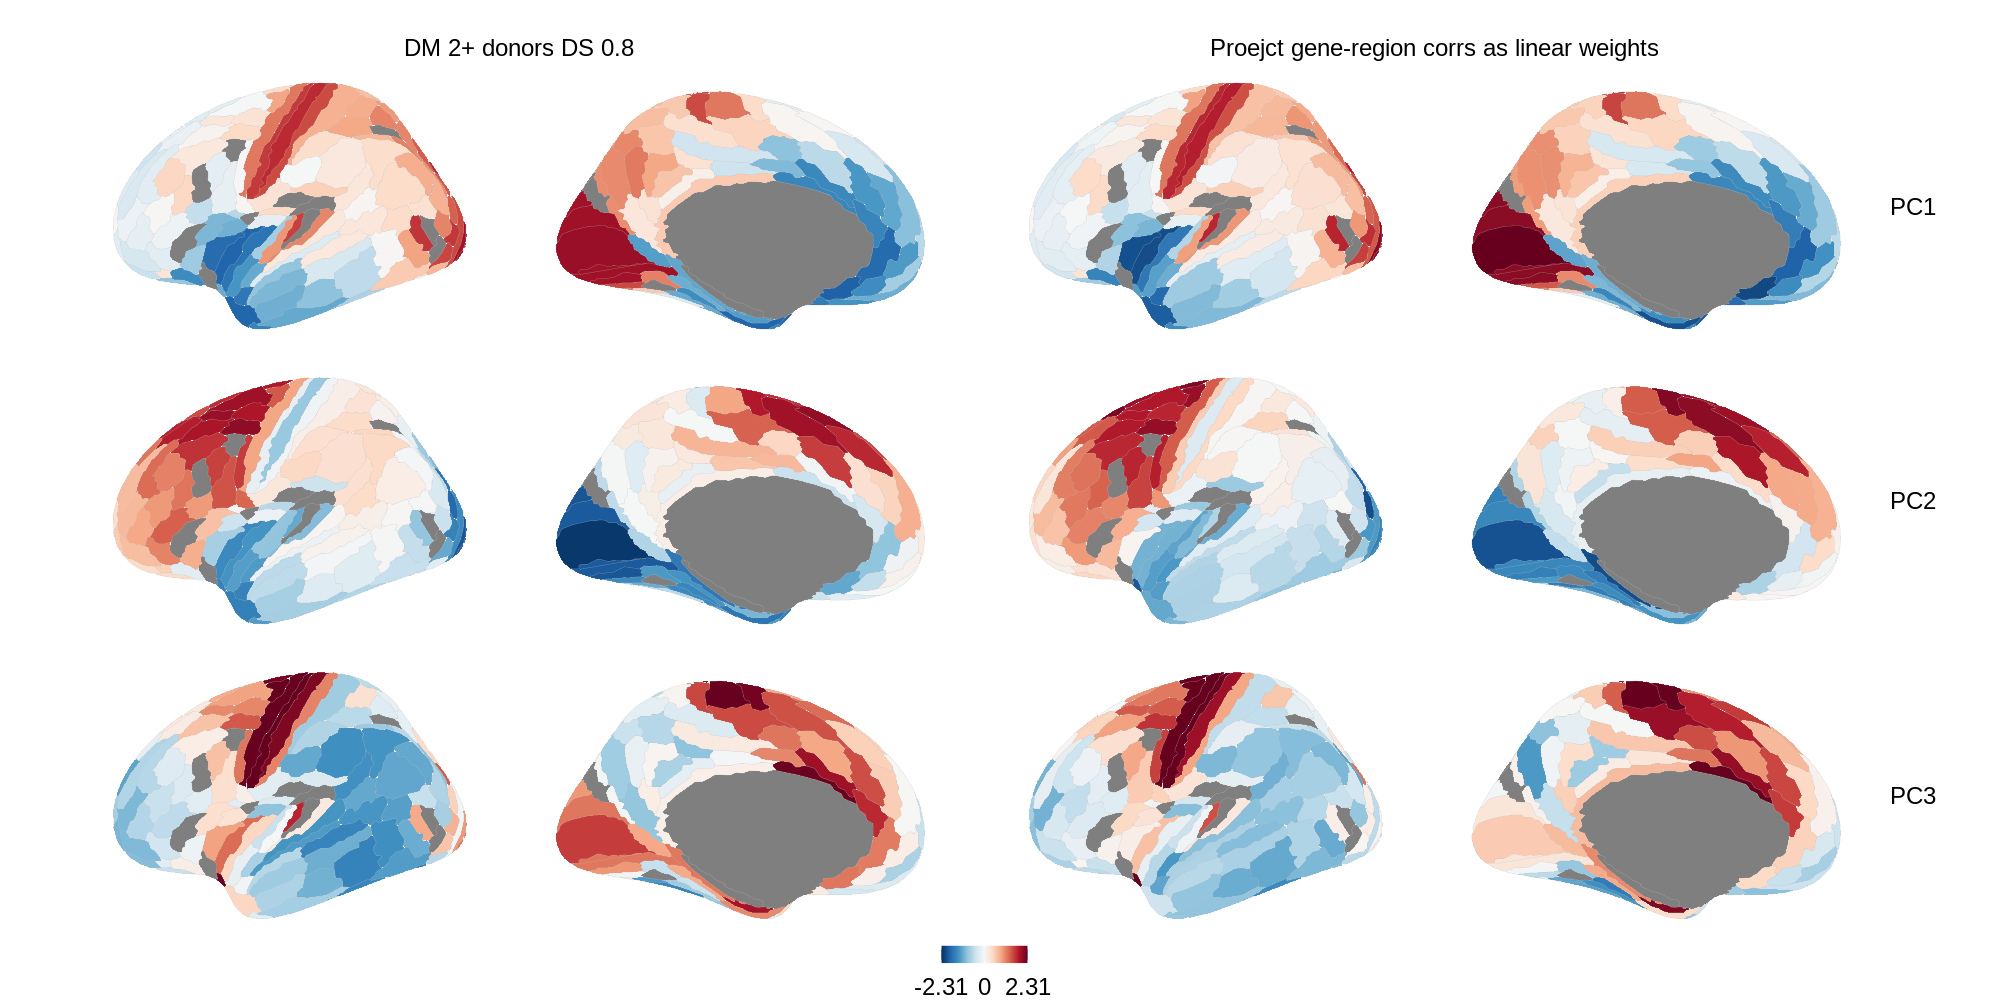

In [314]:
%%R -i scores_df -w 2000 -h 1000
plot_hcp(scores_df, three=T) + theme(text=element_text(size=30))

## Check enrichments

In [325]:
hcp_2donors_ds8_dm.correlate_genes(
    hcp_2donors_ds8_dm.expression, return_ranks=True
).to_csv("../outputs/gene_weights_dm_2donors_ds8.csv")

In [ ]:
hcp_2donors_ds8_dm.correlate_genes(
    exp_2donors, return_ranks=True
).to_csv("../outputs/gene_weights_dm_2donors_ds8_all.csv")

---

# DK

In [28]:
triplets_ds_levels_dk = {}
for ds in [i/10 for i in range(0,10)]:
     triplets_ds_levels_dk[ds] = filter_triplet_ds(triplets_dk, ds)

In [29]:
coefs_dict = {name:disjoint_corrs(t) for name, t in triplets_ds_levels_dk.items()}
scores_dict = {name:disjoint_corrs(t, how='scores') for name, t in triplets_ds_levels_dk.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

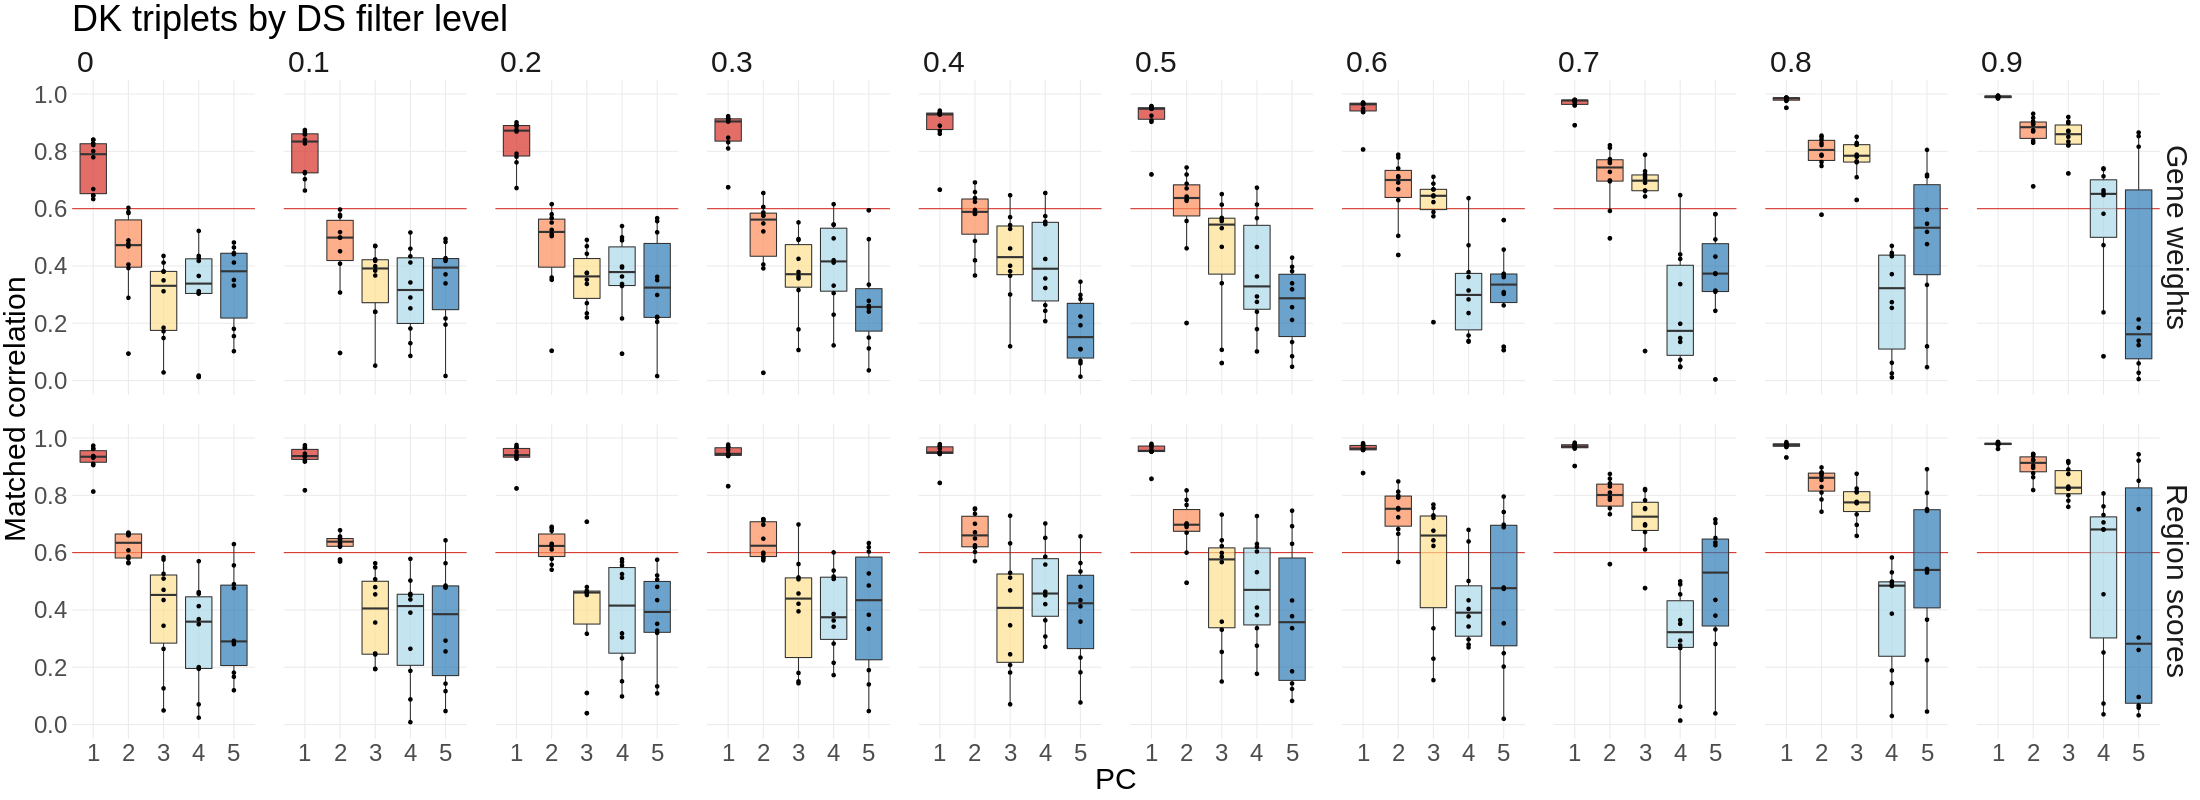

In [30]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) + ggtitle('DK triplets by DS filter level') & theme(text=element_text(size=30))

---

In [85]:
triplets_ds_levels_brain = {}
for ds in [i/10 for i in range(0,10)]:
     triplets_ds_levels_brain[ds] = filter_triplet_ds(triplets_hcp_3donors, ds, only_brain=True)

In [86]:
coefs_dict = {name:disjoint_corrs(t) for name, t in triplets_ds_levels_brain.items()}
scores_dict = {name:disjoint_corrs(t, how='scores') for name, t in triplets_ds_levels_brain.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

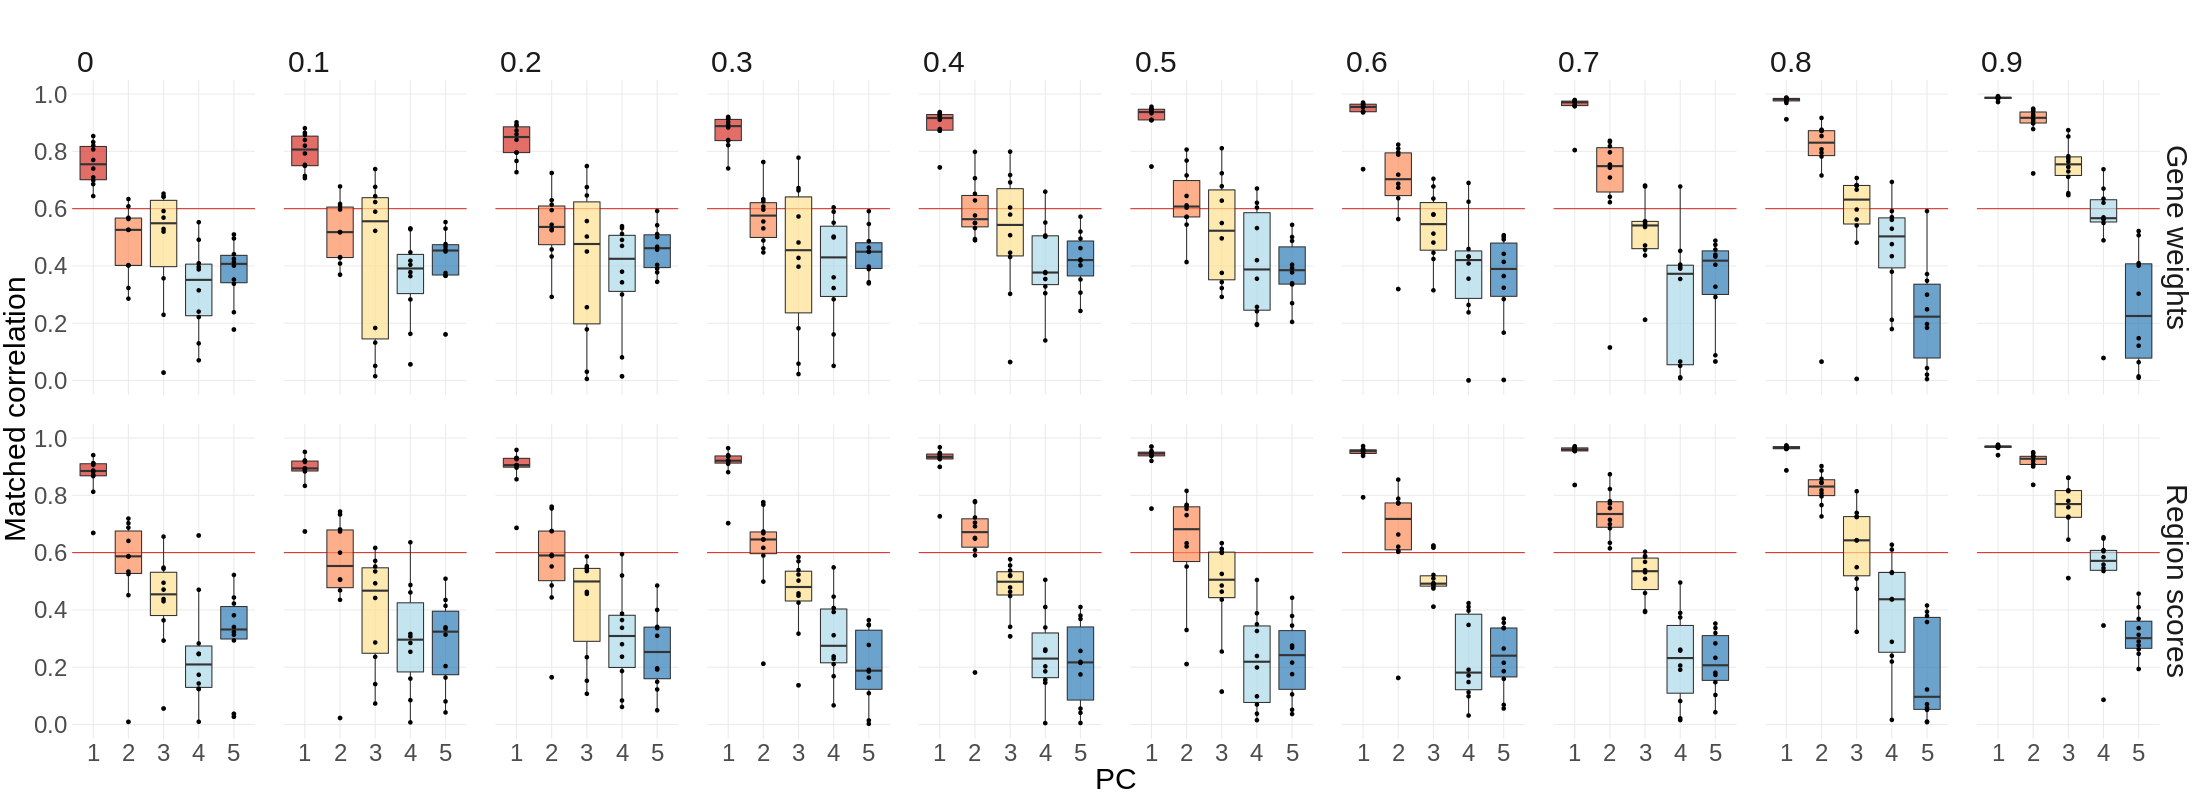

In [87]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

---

In [80]:
def save_pickle(data, fname):
    with open('../outputs/' + fname + '.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
# save_pickle(triplets_hcp, 'triplets_hcp')
save_pickle(triplets_3donors_hcp, 'triplets_3donors_hcp')
save_pickle(triplets_3donors_hcp_native, 'triplets_3donors_hcp_native')

In [78]:
def load_pickle(fname):
    with open('../outputs/' + fname + '.pickle', 'rb') as handle:
        return pickle.load(handle)

triplets_hcp = load_pickle('triplets_hcp')

In [69]:
triplets_hcp = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(fetch_hcp(native=False), donors=donors,
        probe_selection='diff_stability', region_agg='donors',
        lr_mirror='rightleft', #donors_threshold=3, 
        return_stability=True
    )
    triplets_hcp[name] = pcaVersion(expression, message=False)
    triplets_hcp[name].stability = stability

15666 genes remain after filtering for top 1 differential stability
15703 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15927 genes remain after filtering for top 1 differential stability
15568 genes remain after filtering for top 1 differential stability
15730 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15759 genes remain after filtering for top 1 differential stability
15838 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15789 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16118 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16074 genes remain after filtering for top 1 dif

In [9]:
triplets_3donors_hcp = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(fetch_hcp(native=False), donors=donors,
        probe_selection='diff_stability', region_agg='donors',
        donors_threshold=3, lr_mirror='rightleft',
        return_stability=True
    )
    triplets_3donors_hcp[name] = pcaVersion(expression, message=False)
    triplets_3donors_hcp[name].stability = stability

15666 genes remain after filtering for top 1 differential stability
15703 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15927 genes remain after filtering for top 1 differential stability
15568 genes remain after filtering for top 1 differential stability
15730 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15759 genes remain after filtering for top 1 differential stability
15838 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15789 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16118 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16074 genes remain after filtering for top 1 dif

In [52]:
triplets_3donors_hcp_native = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(fetch_hcp(native=True), donors=donors,
        probe_selection='diff_stability', region_agg='donors',
        donors_threshold=3, lr_mirror='rightleft',
        return_stability=True
    )
    triplets_3donors_hcp_native[name] = pcaVersion(expression, message=False)
    triplets_3donors_hcp_native[name].stability = stability

15665 genes remain after filtering for top 1 differential stability
15701 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15926 genes remain after filtering for top 1 differential stability
15564 genes remain after filtering for top 1 differential stability
15728 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15755 genes remain after filtering for top 1 differential stability
15836 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15787 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16120 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16075 genes remain after filtering for top 1 dif

In [20]:
def filter_triplet_ds(triplets, ds_threshold=0):
    triplets_ds = {}
    for name, triplet in triplets.items():
        mask = triplet.stability.rank(pct=True) > ds_threshold
        triplet_expression_ds = triplet.expression.loc[:, mask]
        triplets_ds[name] = pcaVersion(triplet_expression_ds, message=False)
    return triplets_ds

triplets_3donors_hcp_ds8 = filter_triplet_ds(triplets_3donors_hcp, 0.8)

Compare MNI and Native triplets across DS levels

In [100]:
triplets_ds_levels = {}
for ds in [i/10 for i in range(0,10)]:
     triplets_ds_levels[ds] = filter_triplet_ds(triplets_hcp, ds)

In [99]:
# triplets_ds_levels_3donors = triplets_ds_levels
# triplets_ds_levels_native = triplets_ds_levels

In [85]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))

New PCA version


In [109]:
base = None
# base = hcp_base
match = True

coefs_dict = {name:disjoint_corrs(t, base=base, match=match) for name, t in triplets_ds_levels.items()}
scores_dict = {name:disjoint_corrs(t, base=base, match=match, how='scores') for name, t in triplets_ds_levels.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

MNI

DS levels, no donor filter

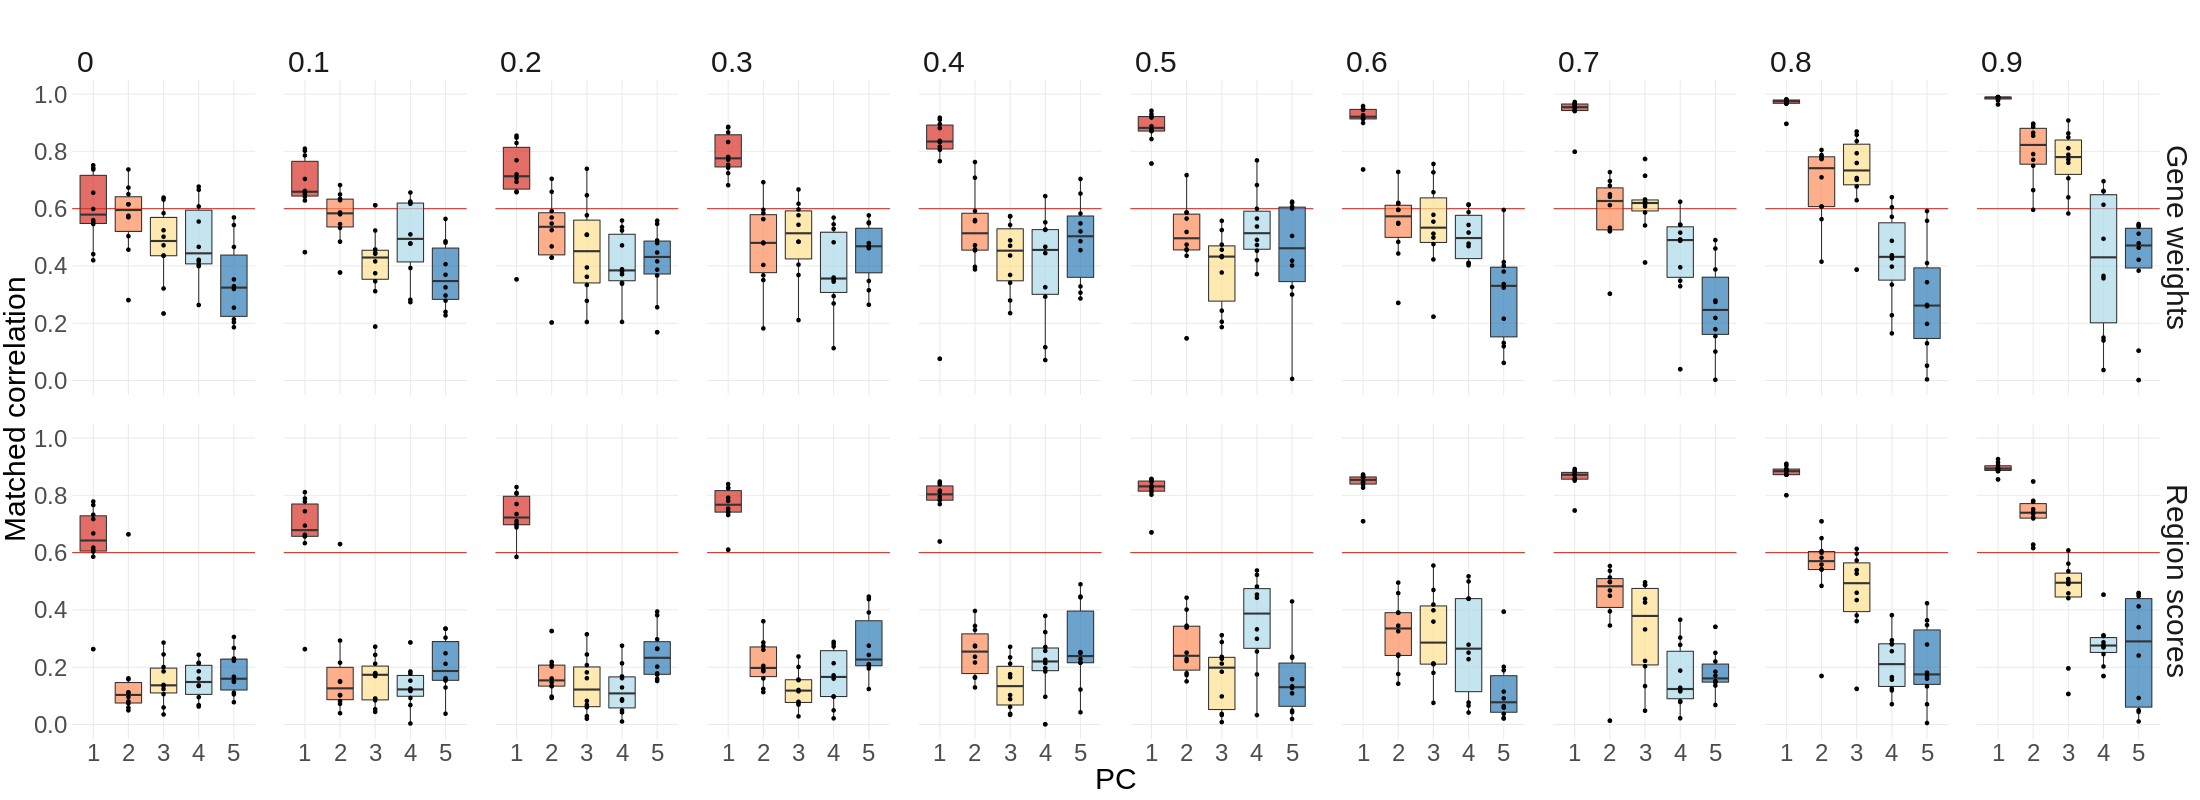

In [110]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

3 donor filter

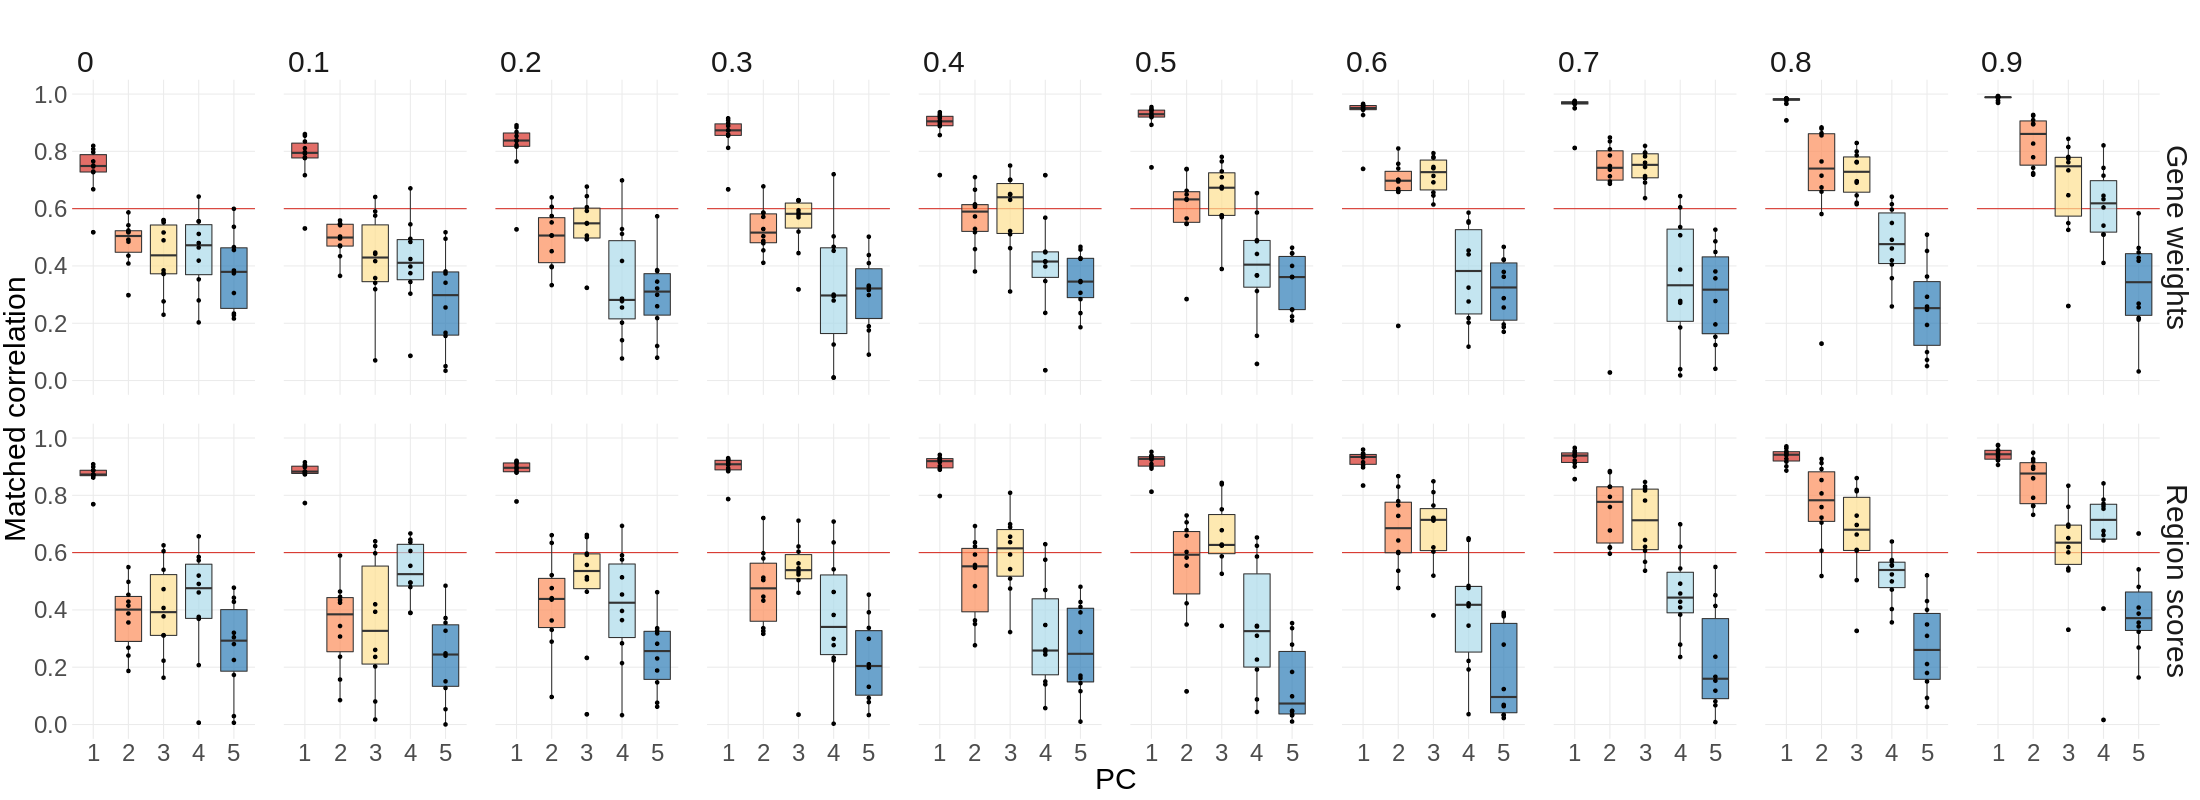

In [94]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

Native

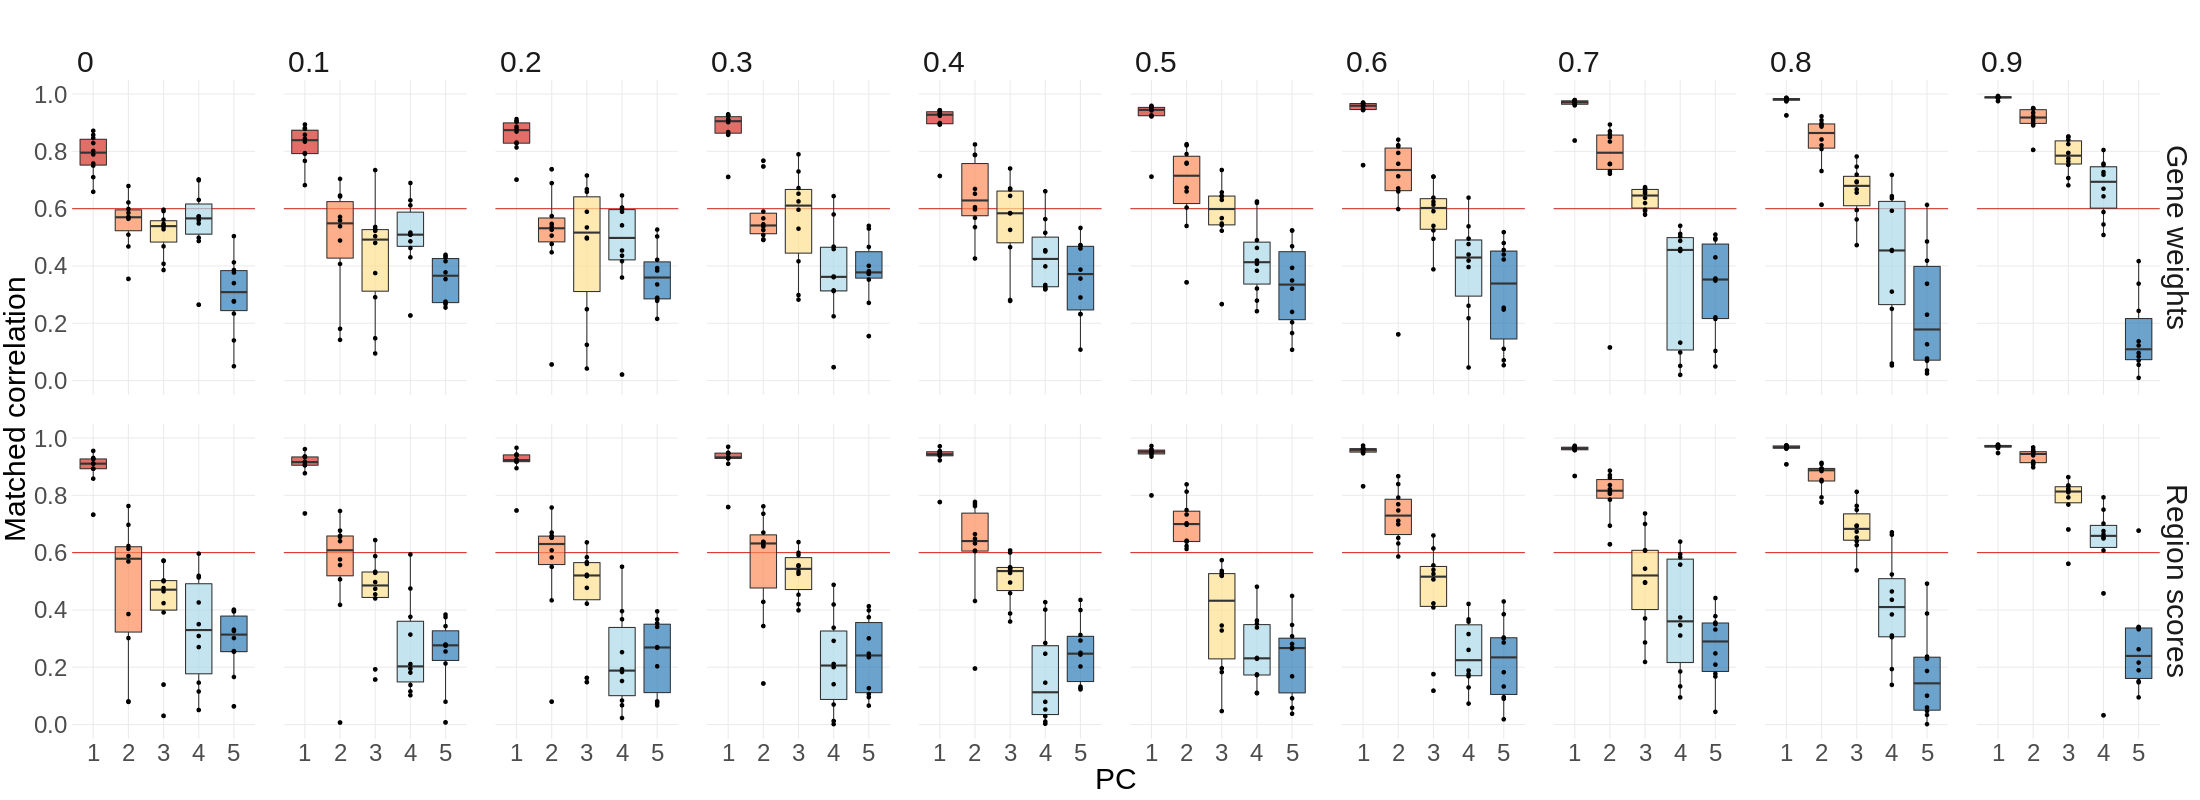

In [68]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

Normal triplets analysis

---

# Brain genes only

In [60]:
# triplets_hcp_brain = filter_triplet_ds(triplets_hcp, only_brain=True)
# triplets_hcp_3donors_brain = filter_triplet_ds(triplets_hcp_3donors, only_brain=True)
# triplets_hcp_ds8_brain = filter_triplet_ds(triplets_hcp, ds_threshold=0.8, only_brain=True)
# triplets_hcp_3donors_ds8_brain = filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, only_brain=True)

coefs_dict = {
    'No filters': disjoint_corrs(triplets_hcp_brain),
    'Region filter \n(3+ donors)': disjoint_corrs(triplets_hcp_3donors_brain),
    'Gene filter \n(top 20% diff. stab.)': disjoint_corrs(triplets_hcp_ds8_brain),
    'Both region \n& gene filters': disjoint_corrs(triplets_hcp_3donors_ds8_brain),
}

scores_dict = {
    'No filters': disjoint_corrs(triplets_hcp_brain, how='scores'),
    'Region filter \n(3+ donors)': disjoint_corrs(triplets_hcp_3donors_brain, how='scores'),
    'Gene filter \n(top 20% diff. stab.)': disjoint_corrs(triplets_hcp_ds8_brain, how='scores'),
    'Both region \n& gene filters': disjoint_corrs(triplets_hcp_3donors_ds8_brain, how='scores'),
}


triplet_versions = (
    pd.concat({'Gene weights':pd.concat(coefs_dict), 'Region scores':pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

AttributeError: 'pcaVersion' object has no attribute 'stability'

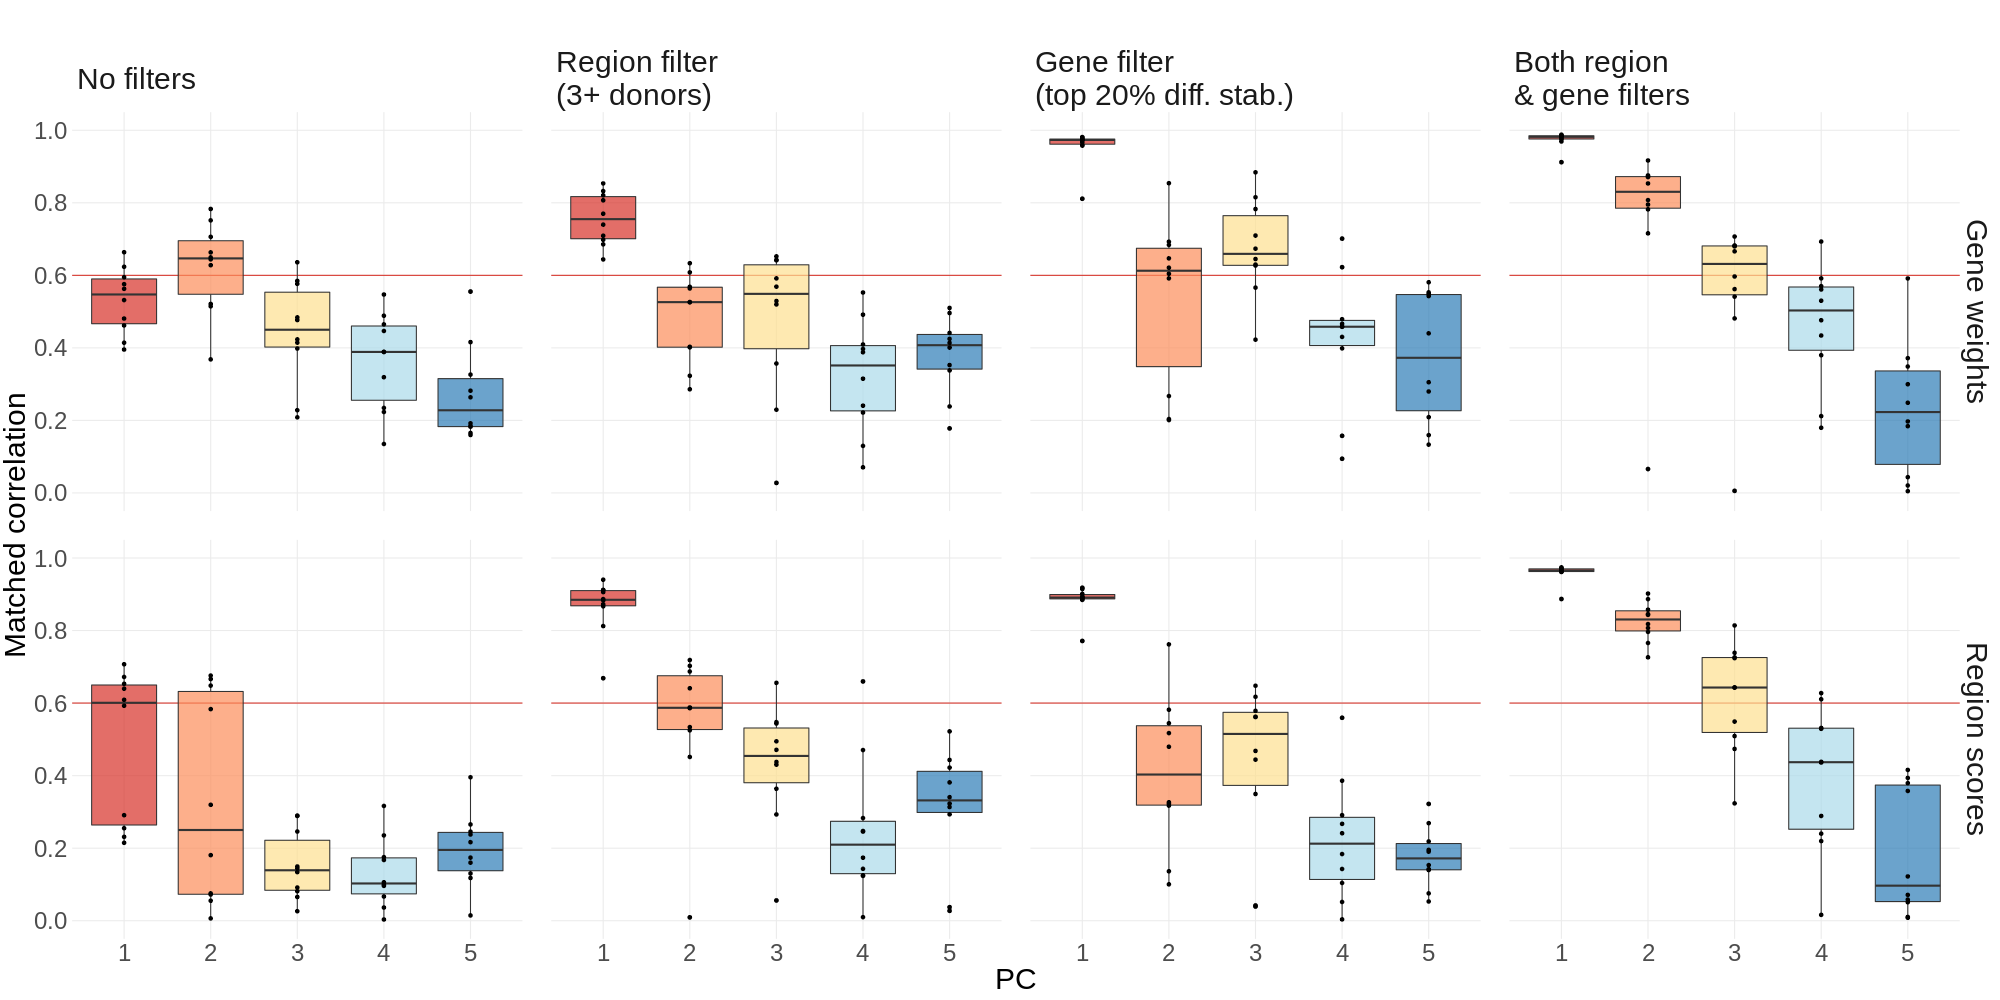

In [61]:
%%R -w 2000 -h 1000 -i triplet_versions
plot_triplets(triplet_versions) & theme(text=element_text(size=30))